<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Science Immersive - Capstone Project

---

# Predicting delayed flights and improving operational performance  

## Exploratory Data Analysis  
<br/><br/>


***

## Table of Contents

* [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    * [3.1 Import libraries and data](#3.1-Import-libraries-and-data)
    * [3.2 Heatmaps and correlations](#3.2-Heatmaps-and-correlations)
    * [3.3 Box Plots and ranges](#3.3-Box-Plots-and-ranges)
    * [3.4 Flight delays and time](#3.4-Flight-delays-and-time)
    * [3.5 Flight delays and airlines](#3.5-Flight-delays-and-airlines)
    * [3.6 Flight delays and countries](#3.6-Flight-delays-and-countries)
    * [3.7 Flight delays and weather](#3.7-Flight-delays-and-weather)  
<br/><br/>


***

# 3. Exploratory Data Analysis

## 3.1 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
# run to avoid warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale=0.8)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# load the data from CSV for consistency reasons
df = pd.read_csv('datasets/mod/df_01.csv', low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195293 entries, 0 to 195292
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  195293 non-null  object 
 1   year                  195293 non-null  int64  
 2   month                 195293 non-null  int64  
 3   day                   195293 non-null  int64  
 4   weekday               195293 non-null  int64  
 5   hour                  195293 non-null  int64  
 6   departing             195293 non-null  float64
 7   terminal_num          135429 non-null  object 
 8   airline_code          184132 non-null  object 
 9   airline_name          183940 non-null  object 
 10  aircraft_type_code    137357 non-null  object 
 11  aircraft_type_name    137357 non-null  object 
 12  service_type          195293 non-null  object 
 13  domestic              195293 non-null  float64
 14  cancelled             195293 non-null  float64
 15  

In [6]:
# display the size of the dataframe
df.shape

(195293, 40)

In [7]:
# display summary statistics for the numerical features
df.describe()

,year,month,day,weekday,hour,departing,domestic,cancelled,regular,CIS_country,...,load_factor,baggage_weight,mail_weight,temperature,relative_humidity,apparent_temperature,precipitation,weather_code,wind_speed,delayed
count,195293.0,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,...,182447.000000,121086.000000,82958.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000
mean,2013.0,7.246266,16.024609,3.009345,13.410388,0.502000,0.593682,0.000456,0.917590,0.106164,...,81.163451,1134.466371,50.708612,9.103383,78.248683,6.827355,0.084761,11.385155,11.967680,0.170308
std,0.0,3.082975,8.765956,2.002745,6.164239,0.499997,0.491146,0.021343,0.274988,0.308048,...,41.278123,1015.762045,140.169544,9.662356,15.507387,11.554376,0.317358,21.362831,5.552934,0.375904
min,2013.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-25.200000,29.000000,-32.900000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,5.000000,9.000000,1.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,66.026000,458.000000,0.000000,2.200000,67.000000,-1.600000,0.000000,1.000000,7.700000,0.000000
50%,2013.0,7.000000,16.000000,3.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,89.474000,887.000000,0.000000,10.200000,82.000000,7.500000,0.000000,2.000000,11.400000,0.000000
75%,2013.0,10.000000,24.000000,5.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,100.000000,1512.000000,23.000000,17.000000,91.000000,16.100000,0.000000,3.000000,15.500000,0.000000
max,2013.0,12.000000,31.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,13800.000000,29117.000000,3842.000000,30.600000,100.000000,34.500000,5.600000,73.000000,37.800000,1.000000


In [8]:
# define different typologies of variables
continuous_vars = ['pax_total', 'pax_1', 'pax_2', 'pax_3', 'pax_4', 'pax_5', 'pax_6', 'load_factor', 'baggage_weight',
                   'mail_weight', 'temperature', 'relative_humidity', 'apparent_temperature', 'precipitation',
                   'wind_speed']

discrete_vars = ['date', 'month', 'day', 'weekday', 'hour']

ordinal_vars = []

nominal_vars = ['terminal_num', 'airline_code', 'airline_name', 'aircraft_type_code', 'aircraft_type_name',
                'service_type', 'country_name', 'flight_number', 'main_delay_code', 'source_delay', 'runway',
                'spot_number', 'weather_code']

binary_vars = ['departing', 'domestic', 'cancelled', 'regular', 'CIS_country']

quant_vars = continuous_vars + discrete_vars

categ_vars = ordinal_vars + nominal_vars + binary_vars

delay = ['delayed']

# the variable 'year' has been excluded because it only contains one value

In [9]:
print('TYPOLOGIES OF VARIABLES')
print('Continuous variables:', len(continuous_vars))
print('Discrete variables:  ', len(discrete_vars))
print('Ordinal variables:   ', len(ordinal_vars))
print('Nominal variables:   ', len(nominal_vars))
print('Binary variables:    ', len(binary_vars))

TYPOLOGIES OF VARIABLES
Continuous variables: 15
Discrete variables:   5
Ordinal variables:    0
Nominal variables:    13
Binary variables:     5


## 3.2 Heatmaps and correlations

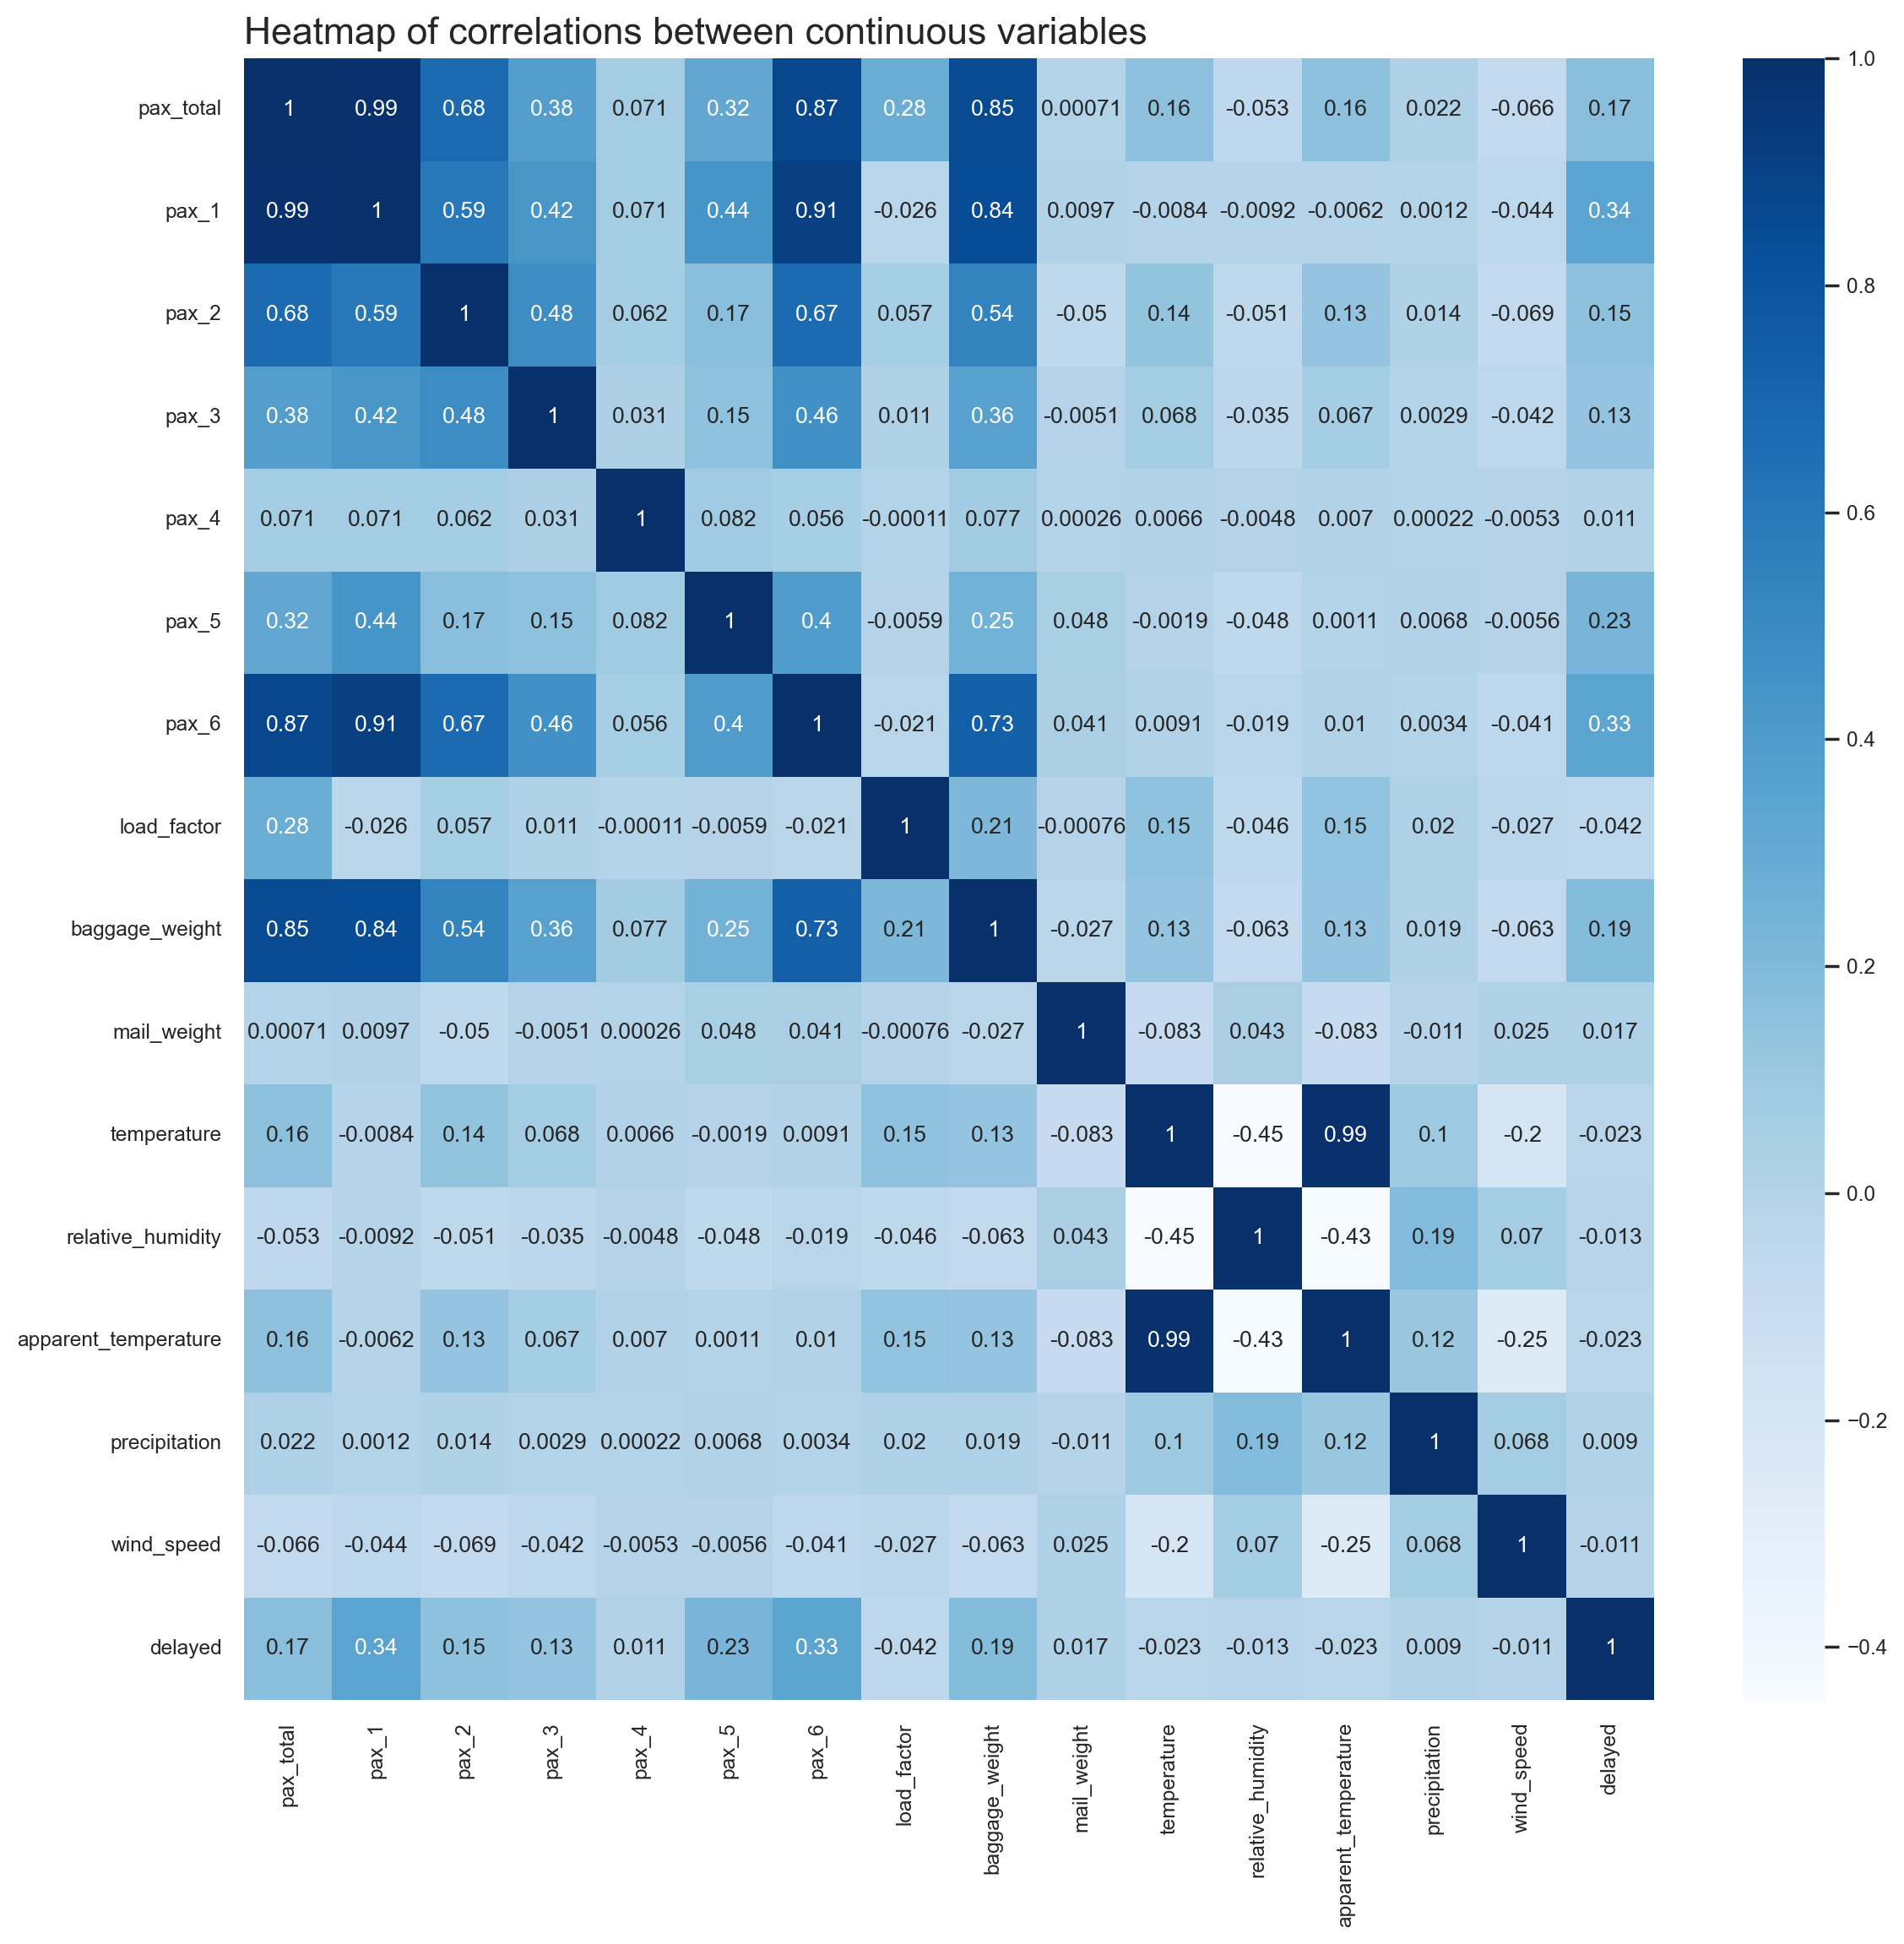

In [10]:
# create heatmap to explore correlations between continuous variables and delay
plt.figure(figsize=(12, 12))
plt.title('Heatmap of correlations between continuous variables', loc='left', fontsize = 16)
sns.heatmap(df[continuous_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

In [11]:
# define subtypology of variables
cont_vars_sub = ['pax_1', 'pax_6', 'pax_5', 'baggage_weight']

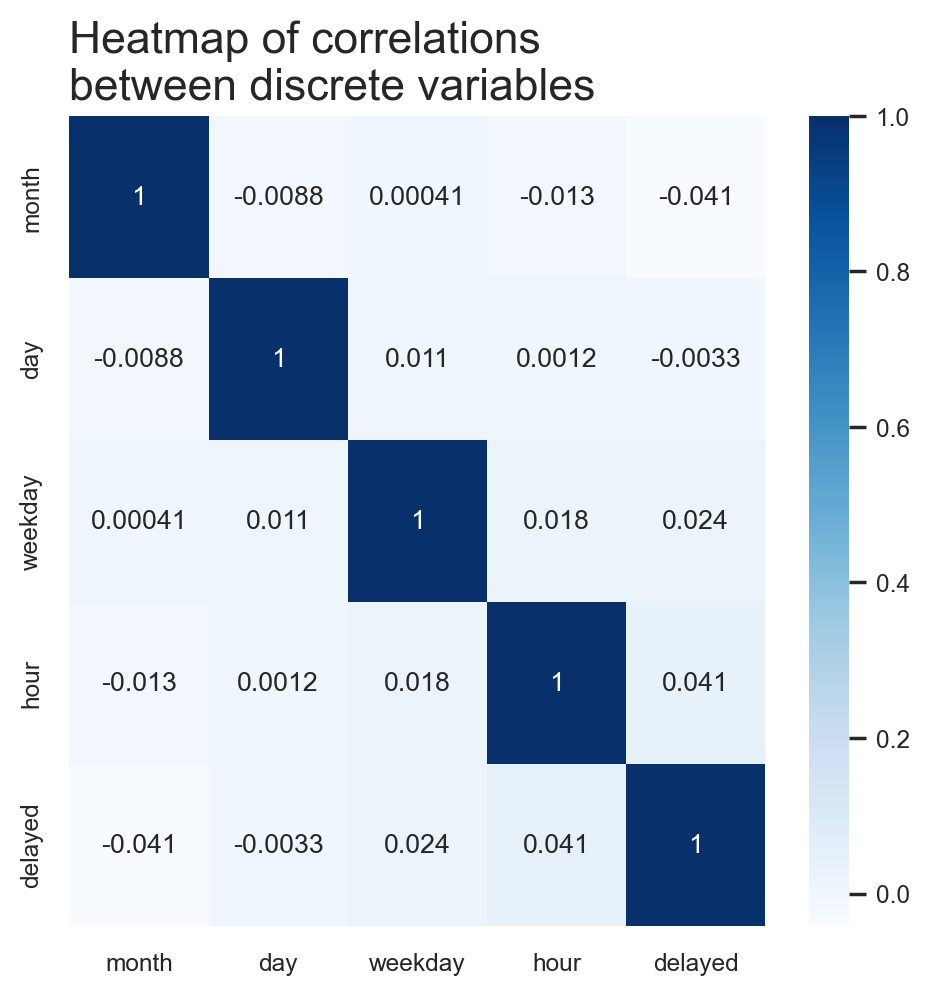

In [12]:
# create heatmap to explore correlations between discrete variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween discrete variables', loc='left', fontsize = 16)
sns.heatmap(df[discrete_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

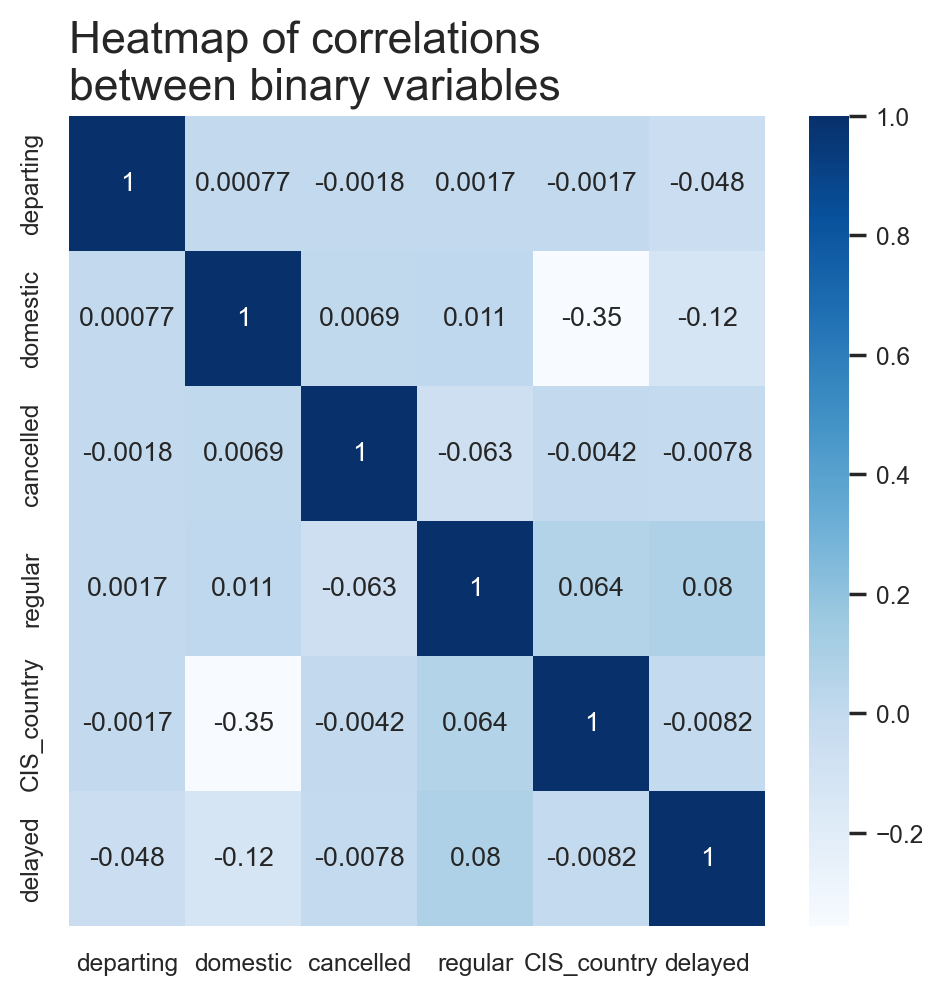

In [13]:
# create heatmap to explore correlations between binary variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween binary variables', loc='left', fontsize = 16)
sns.heatmap(df[binary_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

There are not meaningful correlations between the different variables and the delay.  
<br/><br/>


In [14]:
# define a function that standardise the variables
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [15]:
# create dataframe with continuous, discrete and binary variables standardised
df_stand = var_standardized(df[continuous_vars+discrete_vars+binary_vars])

In [16]:
df_stand

,CIS_country,apparent_temperature,baggage_weight,cancelled,date,day,departing,domestic,hour,load_factor,...,pax_4,pax_5,pax_6,pax_total,precipitation,regular,relative_humidity,temperature,weekday,wind_speed
0,-0.344634,-0.798603,2.158511,-0.021353,NaN,-1.713973,-1.004005,-1.208768,-1.688836,-0.328926,...,-0.04032,-0.388382,-0.808070,1.413327,-0.267084,0.299684,1.015730,-0.849004,-1.003295,0.185905
1,-0.344634,-0.798603,NaN,-0.021353,NaN,-1.713973,-1.004005,-1.208768,-1.688836,NaN,...,-0.04032,-0.388382,-0.808070,NaN,-0.267084,-3.336835,1.015730,-0.849004,-1.003295,0.185905
2,-0.344634,-0.841876,2.057109,-0.021353,NaN,-1.713973,0.996006,-1.208768,-1.364384,0.327136,...,-0.04032,0.379055,3.194416,2.762927,-0.267084,0.299684,1.015730,-0.849004,-1.003295,0.906245
3,-0.344634,-0.876495,NaN,-0.021353,NaN,-1.713973,0.996006,-1.208768,-1.202158,NaN,...,-0.04032,-0.388382,-0.808070,NaN,-0.267084,-3.336835,1.015730,-0.869703,-1.003295,1.104339
4,-0.344634,-0.902459,-0.876649,-0.021353,NaN,-1.713973,-1.004005,-1.208768,-1.039932,-1.766758,...,-0.04032,-0.388382,-0.607945,-1.377890,0.363119,0.299684,1.015730,-0.859354,-1.003295,1.374466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195288,-0.344634,-0.833222,-0.909137,-0.021353,NaN,1.708358,-1.004005,0.827284,1.393459,-1.126419,...,-0.04032,-0.388382,-0.808070,-1.193853,-0.267084,0.299684,0.370876,-0.817956,-1.003295,0.744169
195289,-0.344634,-0.833222,-0.767371,-0.021353,NaN,1.708358,-1.004005,0.827284,1.393459,-0.480411,...,-0.04032,-0.388382,-0.808070,-0.887126,-0.267084,0.299684,0.370876,-0.817956,-1.003295,0.744169
195290,-0.344634,-0.833222,0.895420,-0.021353,NaN,1.708358,-1.004005,-1.208768,1.393459,0.558348,...,-0.04032,-0.388382,2.022259,1.444000,-0.267084,0.299684,0.370876,-0.817956,-1.003295,0.744169
195291,-0.344634,-0.833222,-0.788045,-0.021353,NaN,1.708358,0.996006,-1.208768,1.393459,-0.414952,...,-0.04032,-0.388382,0.235436,-0.473045,-0.267084,0.299684,0.370876,-0.817956,-1.003295,0.744169


## 3.3 Box Plots and ranges

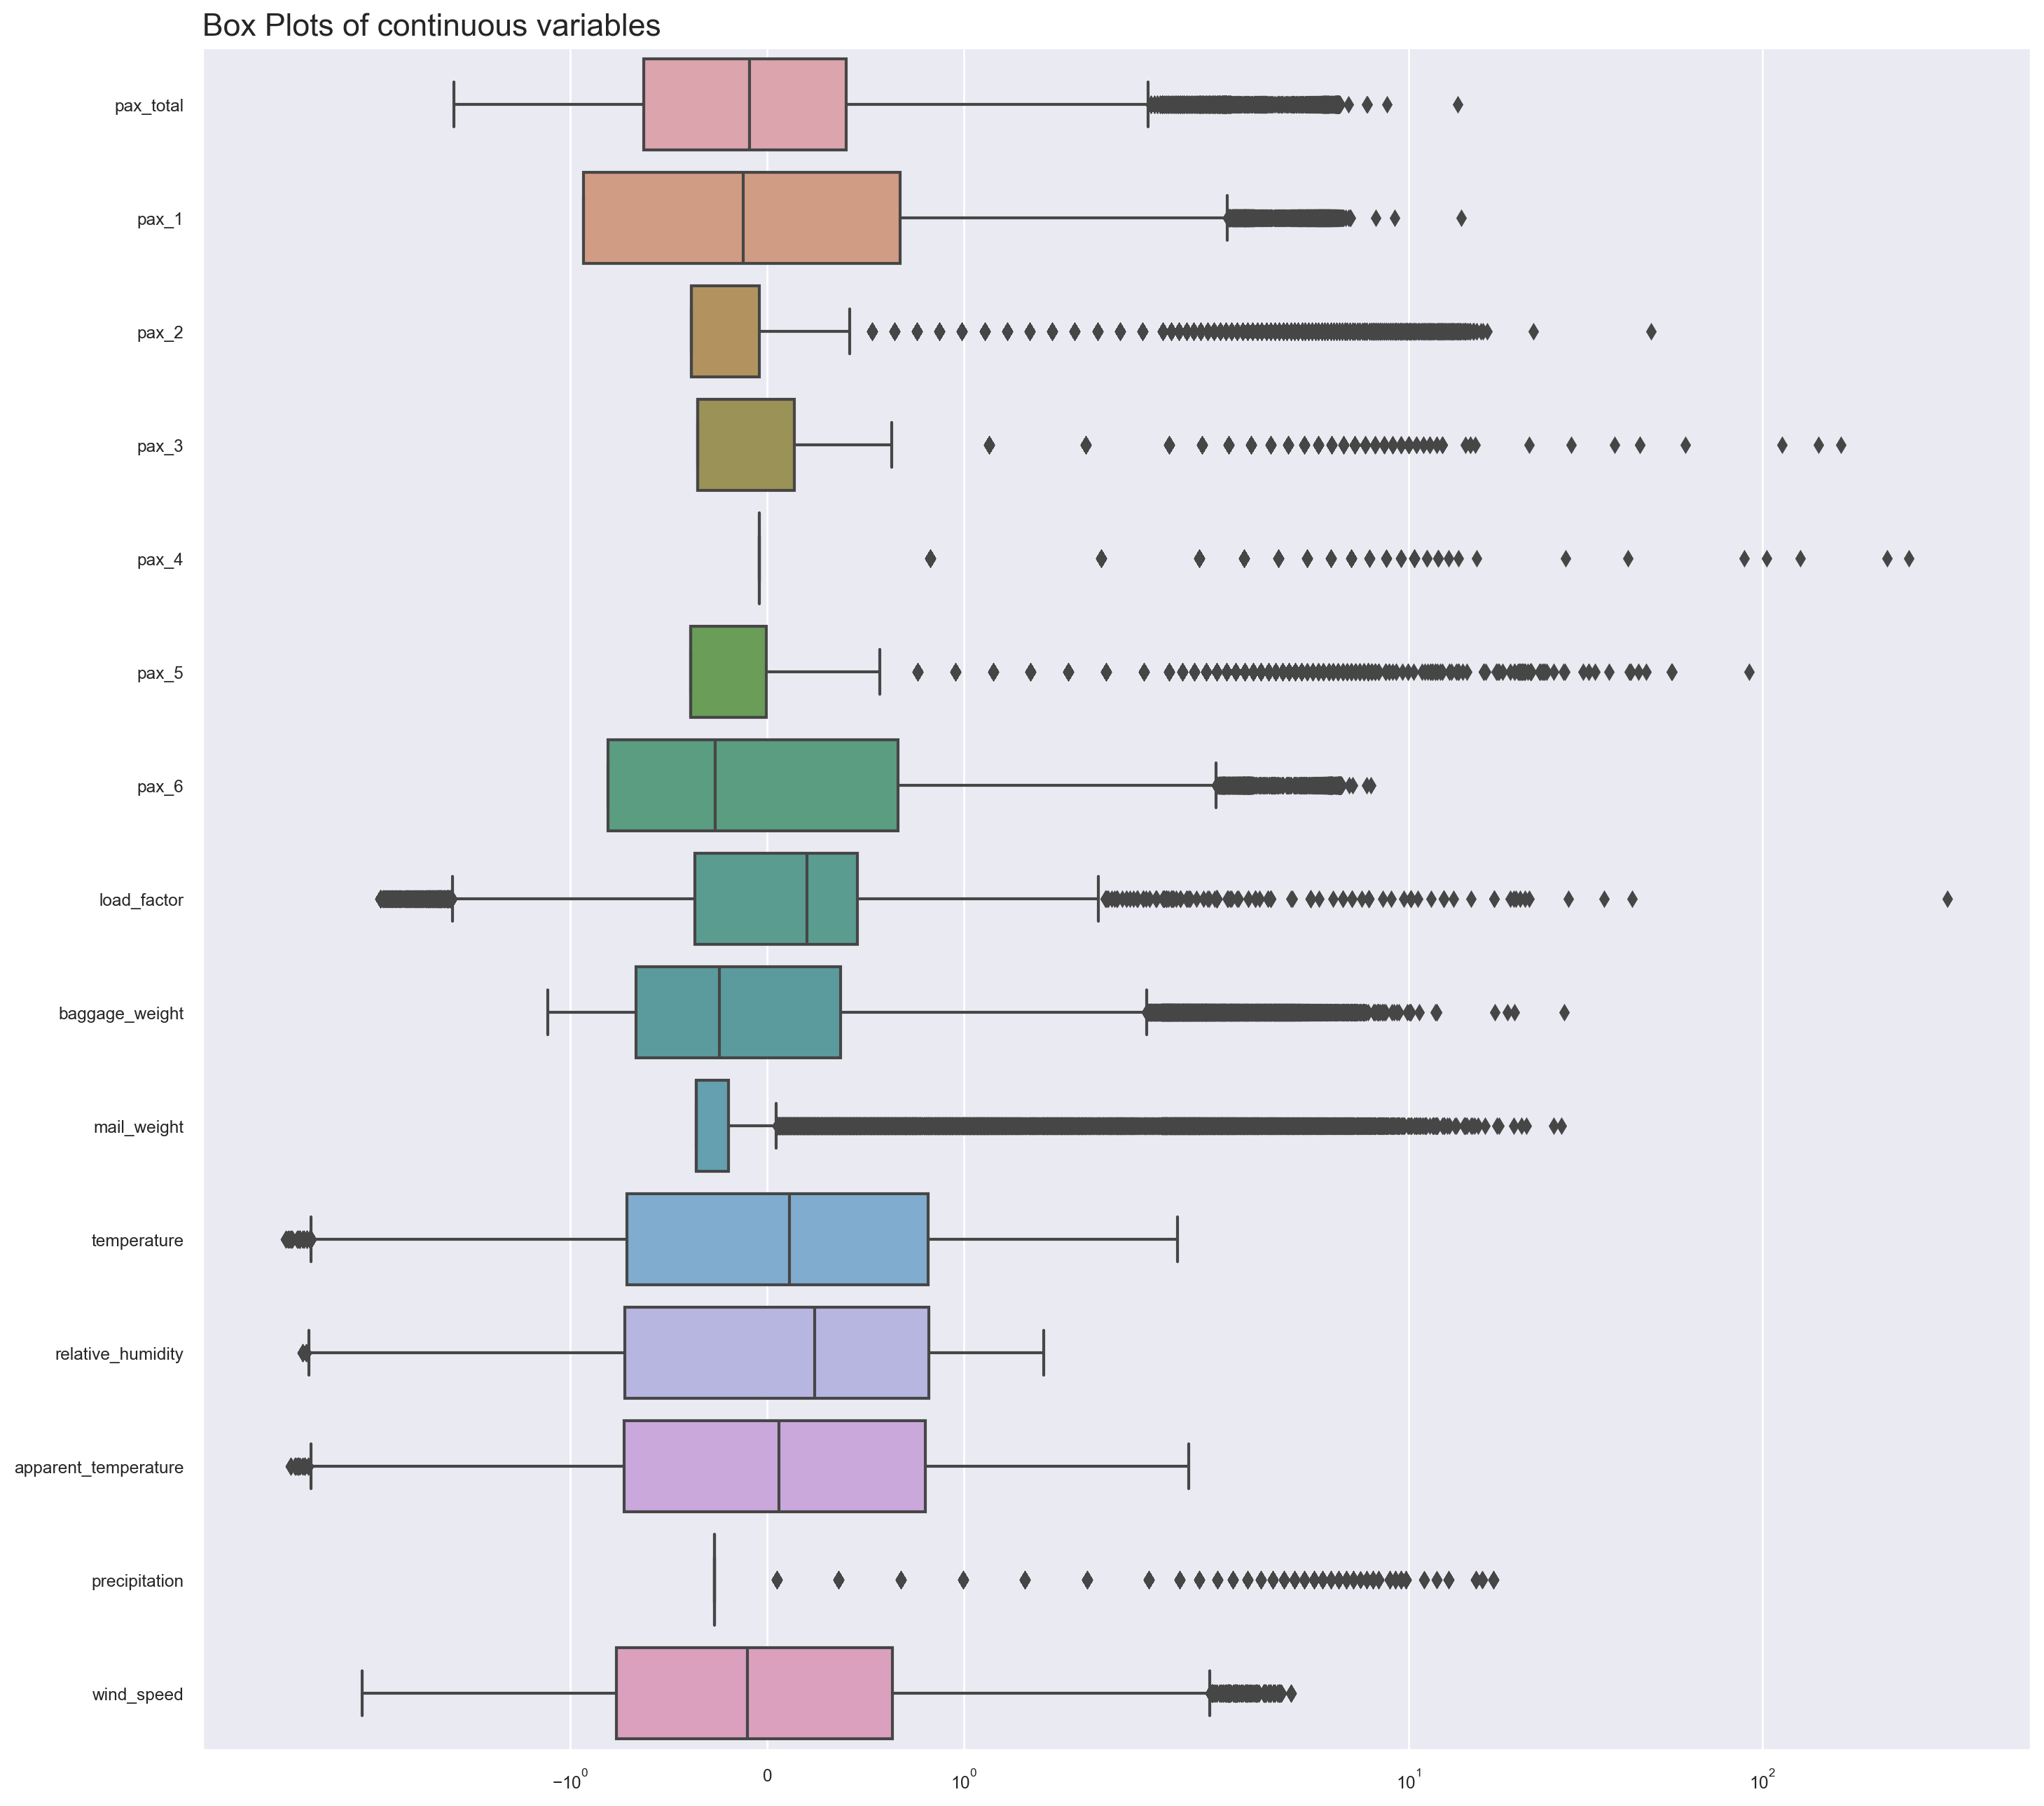

In [17]:
# create box plots of continuous variables to understand the different ranges
fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Box Plots of continuous variables', loc='left', fontsize = 16)
sns.boxplot(data=df_stand[continuous_vars], orient='h', fliersize=5,
            linewidth=1.5, notch=False, saturation=0.5, ax=ax)
plt.xscale('symlog')
plt.autoscale(True)
plt.show()

Some variables show a large amount of **outliers**, I am going to keep them for now.  
<br/><br/>

In [19]:
# create subsets of dataframe using conditions
delay = df[df.delayed == 1]
nodelay = df[df.delayed == 0]

In [20]:
# display the time of the day with most delays in absolute terms
time_abs = delay.groupby('hour').count().sort_values(by='delayed', ascending=False)[['delayed']]
time_abs

,delayed
hour,
17,2805
16,2485
18,2259
15,2240
22,1867
21,1835
23,1797
20,1781
14,1683


In [21]:
# display the time of the day with most delays relatively to the total number of flights
time_rel = time_abs / df.groupby('hour').count()[['delayed']]
time_rel.sort_values(by='delayed', ascending=False)

,delayed
hour,
3,0.345411
1,0.273223
2,0.259434
4,0.258368
17,0.239498
23,0.230385
0,0.220222
16,0.200597
18,0.198541


## 3.4 Flight delays and time

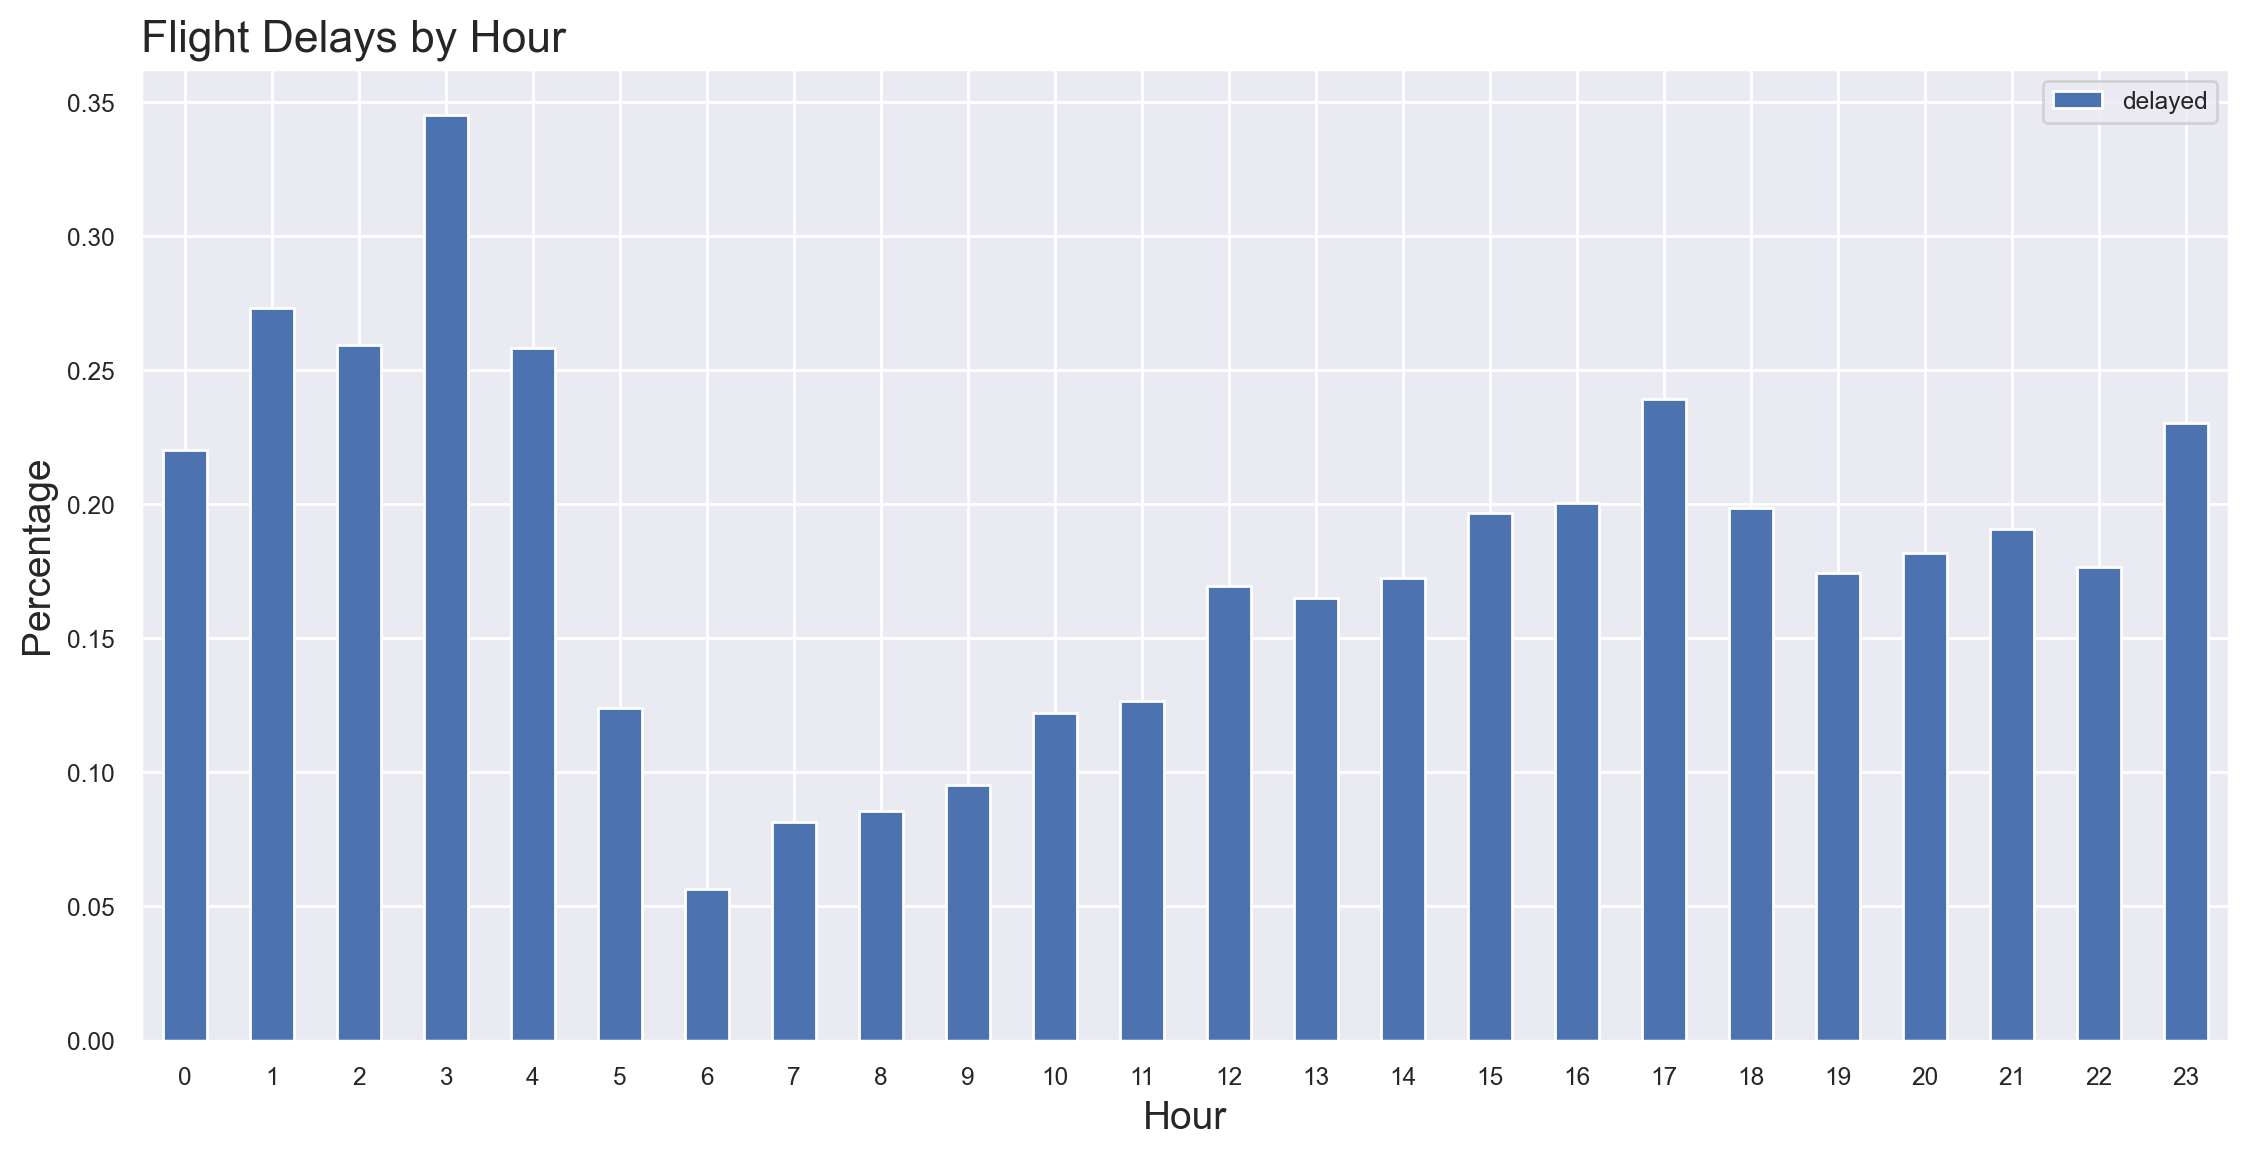

In [22]:
# create bar plot showing relative flight delays by hour
time_rel.plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Flight Delays by Hour', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Hour', fontsize = 14)
plt.show()

The graph above shows that **3am** has relatively the most delays during the day, while **6am** has the least.  
I assume that at 3am most flights are arriving, so this does not represent an internal operational issue.  
<br/><br/>

In [23]:
# display the day of the week with most delays in absolute terms (0 is for Monday)
day_abs = delay.groupby('weekday').count().sort_values(by='delayed', ascending=False)[['delayed']]
day_abs

,delayed
weekday,
4,5569
5,5111
6,4926
0,4783
2,4633
3,4348
1,3890


In [24]:
# display the day of the week with most delays relatively to the total number of flights
day_rel = day_abs / df.groupby('weekday').count()[['delayed']]
day_rel.sort_values(by='delayed', ascending=False)

,delayed
weekday,
5,0.189402
4,0.188180
6,0.174057
0,0.167525
2,0.166361
3,0.158437
1,0.146406


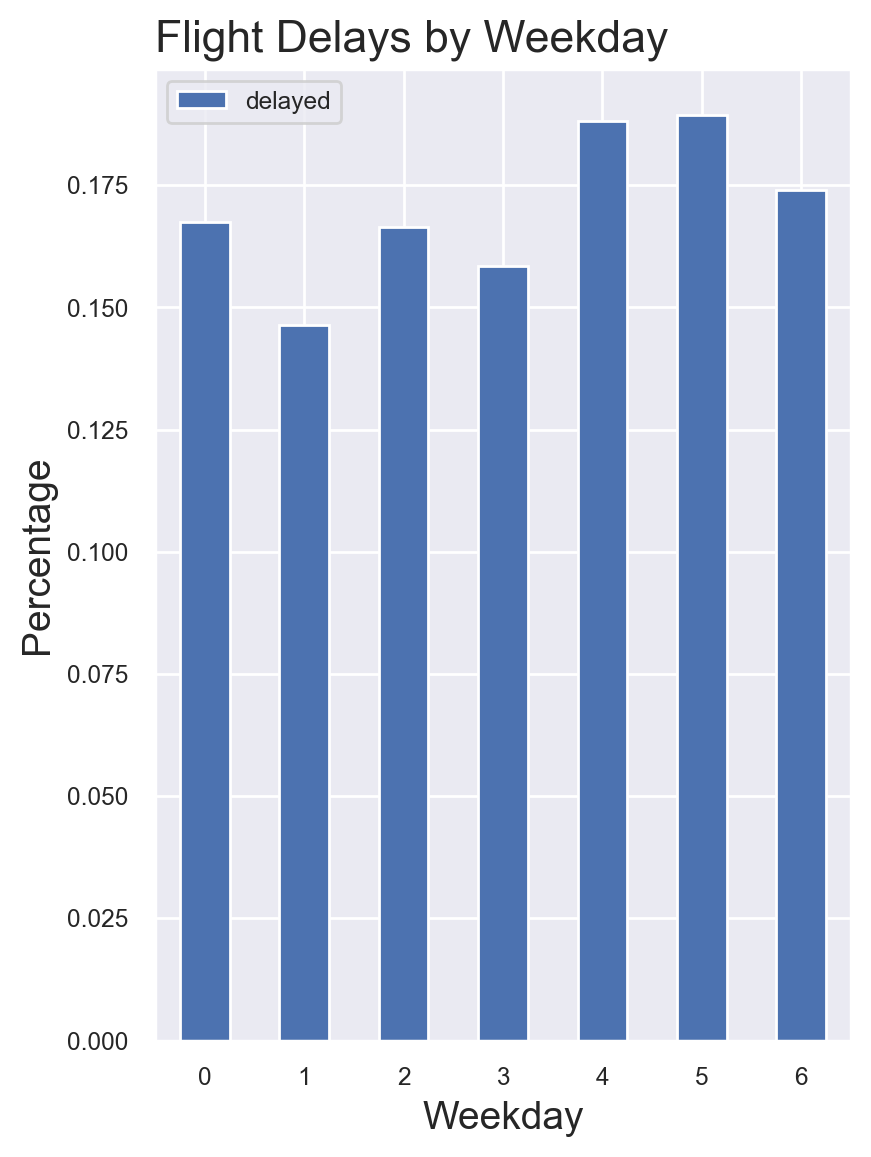

In [152]:
# create bar plot showing relative flight delays by weekday
day_rel.plot(kind='bar', rot=0, figsize=(4,6))
plt.title('Flight Delays by Weekday', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Weekday', fontsize = 14)
plt.show()

The graph above shows that **Saturday** has relatively the most delays during the week, while **Tuesday** has the least.  
<br/><br/>

In [25]:
# display the month of the year with most delays in absolute terms
month_abs = delay.groupby('month').count().sort_values(by='delayed', ascending=False)[['delayed']]
month_abs

,delayed
month,
6,3799
7,3646
9,3599
8,3576
12,3114
10,2820
5,2444
11,2185
3,2158


In [26]:
# display the month of the year with most delays relatively to the total number of flights
month_rel = month_abs / df.groupby('month').count()[['delayed']]
month_rel.sort_values(by='delayed', ascending=False)

,delayed
month,
1,0.233462
3,0.228336
2,0.218028
9,0.186728
6,0.183642
12,0.177770
7,0.171625
8,0.160582
4,0.157160


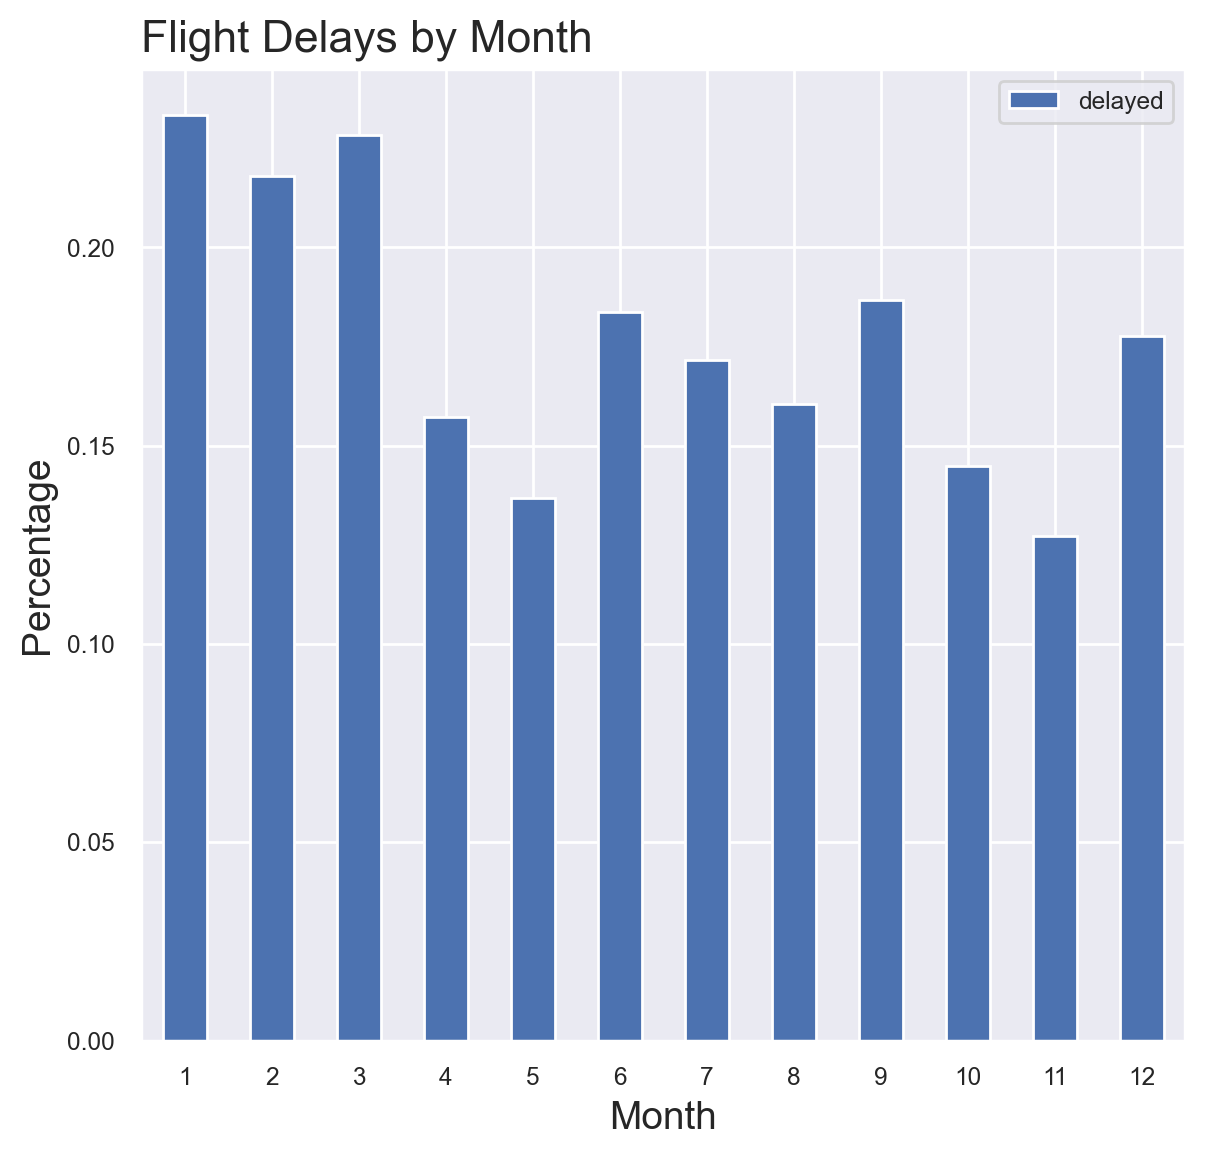

In [27]:
# create bar plot showing relative flight delays by month
month_rel.plot(kind='bar', rot=0, figsize=(6,6))
plt.title('Flight Delays by Month', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

The graph above shows that **January** has relatively the most delays during the year, while **November** has the least.  
<br/><br/>

## 3.5 Flight delays and airlines

In [28]:
# display the airline with most delays in absolute terms
airline_abs = delay.groupby('airline_name').count().sort_values(by='delayed', ascending=False)[['delayed']]
airline_abs

,delayed
airline_name,
ROSSIYA AIRLINES,8036
AEROFLOT,4439
TRANSAERO,2745
LUFTHANSA,2139
S7 AIRLINES,896
...,...
KOSMOS AIRLINES,1
NIKI,1
PROAIR AVIATION,1


In [29]:
# display the airline with most delays relatively to the total number of flights
airline_rel = airline_abs / df.groupby('airline_name').count()[['delayed']]
airline_rel.sort_values(by='delayed', ascending=False)

,delayed
airline_name,
ATLASJET,1.000000
TULPAR AIR,1.000000
AEROSVIT - UKRAINIAN AIRLINES,0.846154
PEGAS FLY,0.800000
KLM-ROYAL DUTCH AIRLINES,0.670330
...,...
TRAVEL SERVICE,NaN
VISTA JET,NaN
VOSTOK AIRLINES,NaN


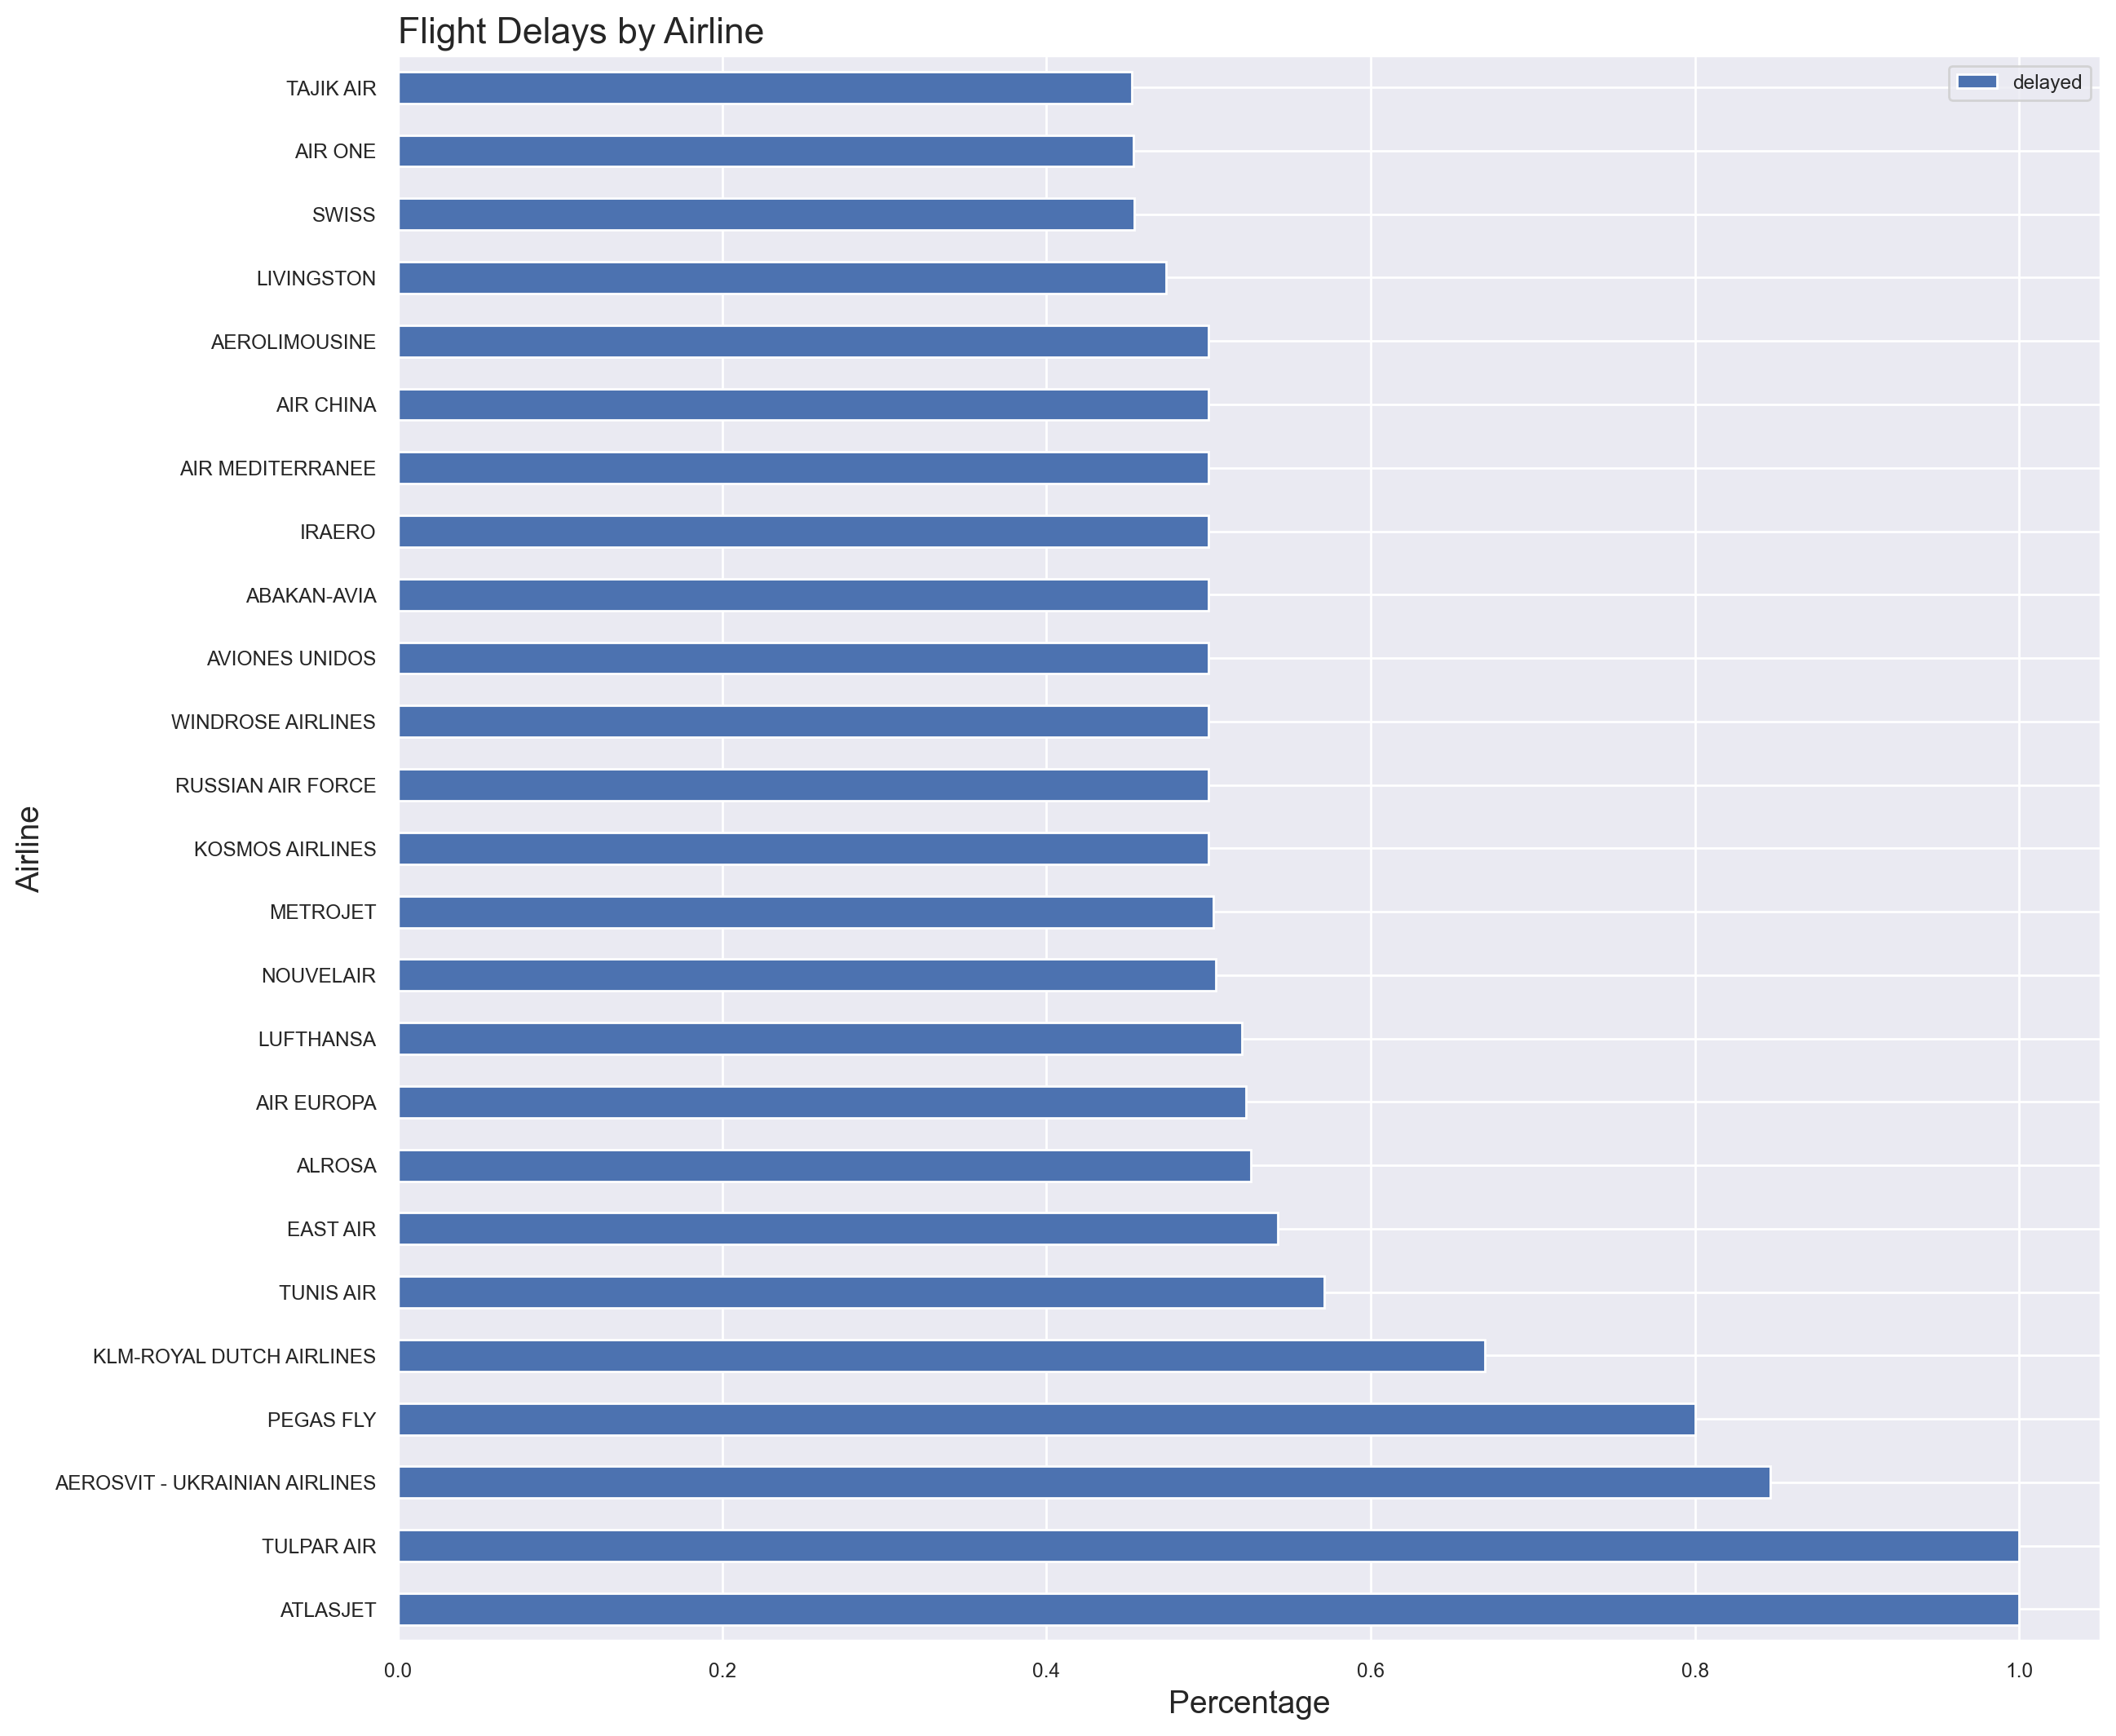

In [30]:
# create horizontal bar plot showing relative flight delays by airline
airline_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Airline', loc='left', fontsize = 16)
plt.ylabel('Airline', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **ATLASJET** and **TULPAR AIR** have relatively the most delays among the airlines.  
<br/><br/>

In [31]:
# display the aircraft type with most delays in absolute terms
aircraft_abs = delay.groupby(['aircraft_type_name','aircraft_type_code']).count().sort_values(by='delayed',
               ascending=False)[['delayed']]
aircraft_abs

delayed
aircraft_type_name   aircraft_type_code         
AIRBUS               320                    6449
                     32S                    6079
                     321                    3513
                     319                    2489
BOEING               735                    2028
...                                          ...
LEARJET              LR5                       1
                     LR3                       1
                     LJ5                       1
GULFSTREAM AEROSPACE GRJ                       1
PIAGGIO              P18                       1

[122 rows x 1 columns]

In [32]:
# display the aircraft type with most delays relatively to the total number of flights
aircraft_rel = aircraft_abs / df.groupby(['aircraft_type_name','aircraft_type_code']).count()[['delayed']]
aircraft_rel.sort_values(by='delayed', ascending=False)

delayed
aircraft_type_name  aircraft_type_code          
AEROSPATIALE/ALENIA AT4                 1.000000
TUPOLEV             T24                 0.653846
AIRBUS              313                 0.647727
BOEING              739                 0.557562
                    73H                 0.545455
...                                          ...
ROBINSON            R66                      NaN
ROCKWELL            SBR1                     NaN
SOCATA              TB7                      NaN
TRANSAL             C16                      NaN
VIRUS               PIVI                     NaN

[174 rows x 1 columns]

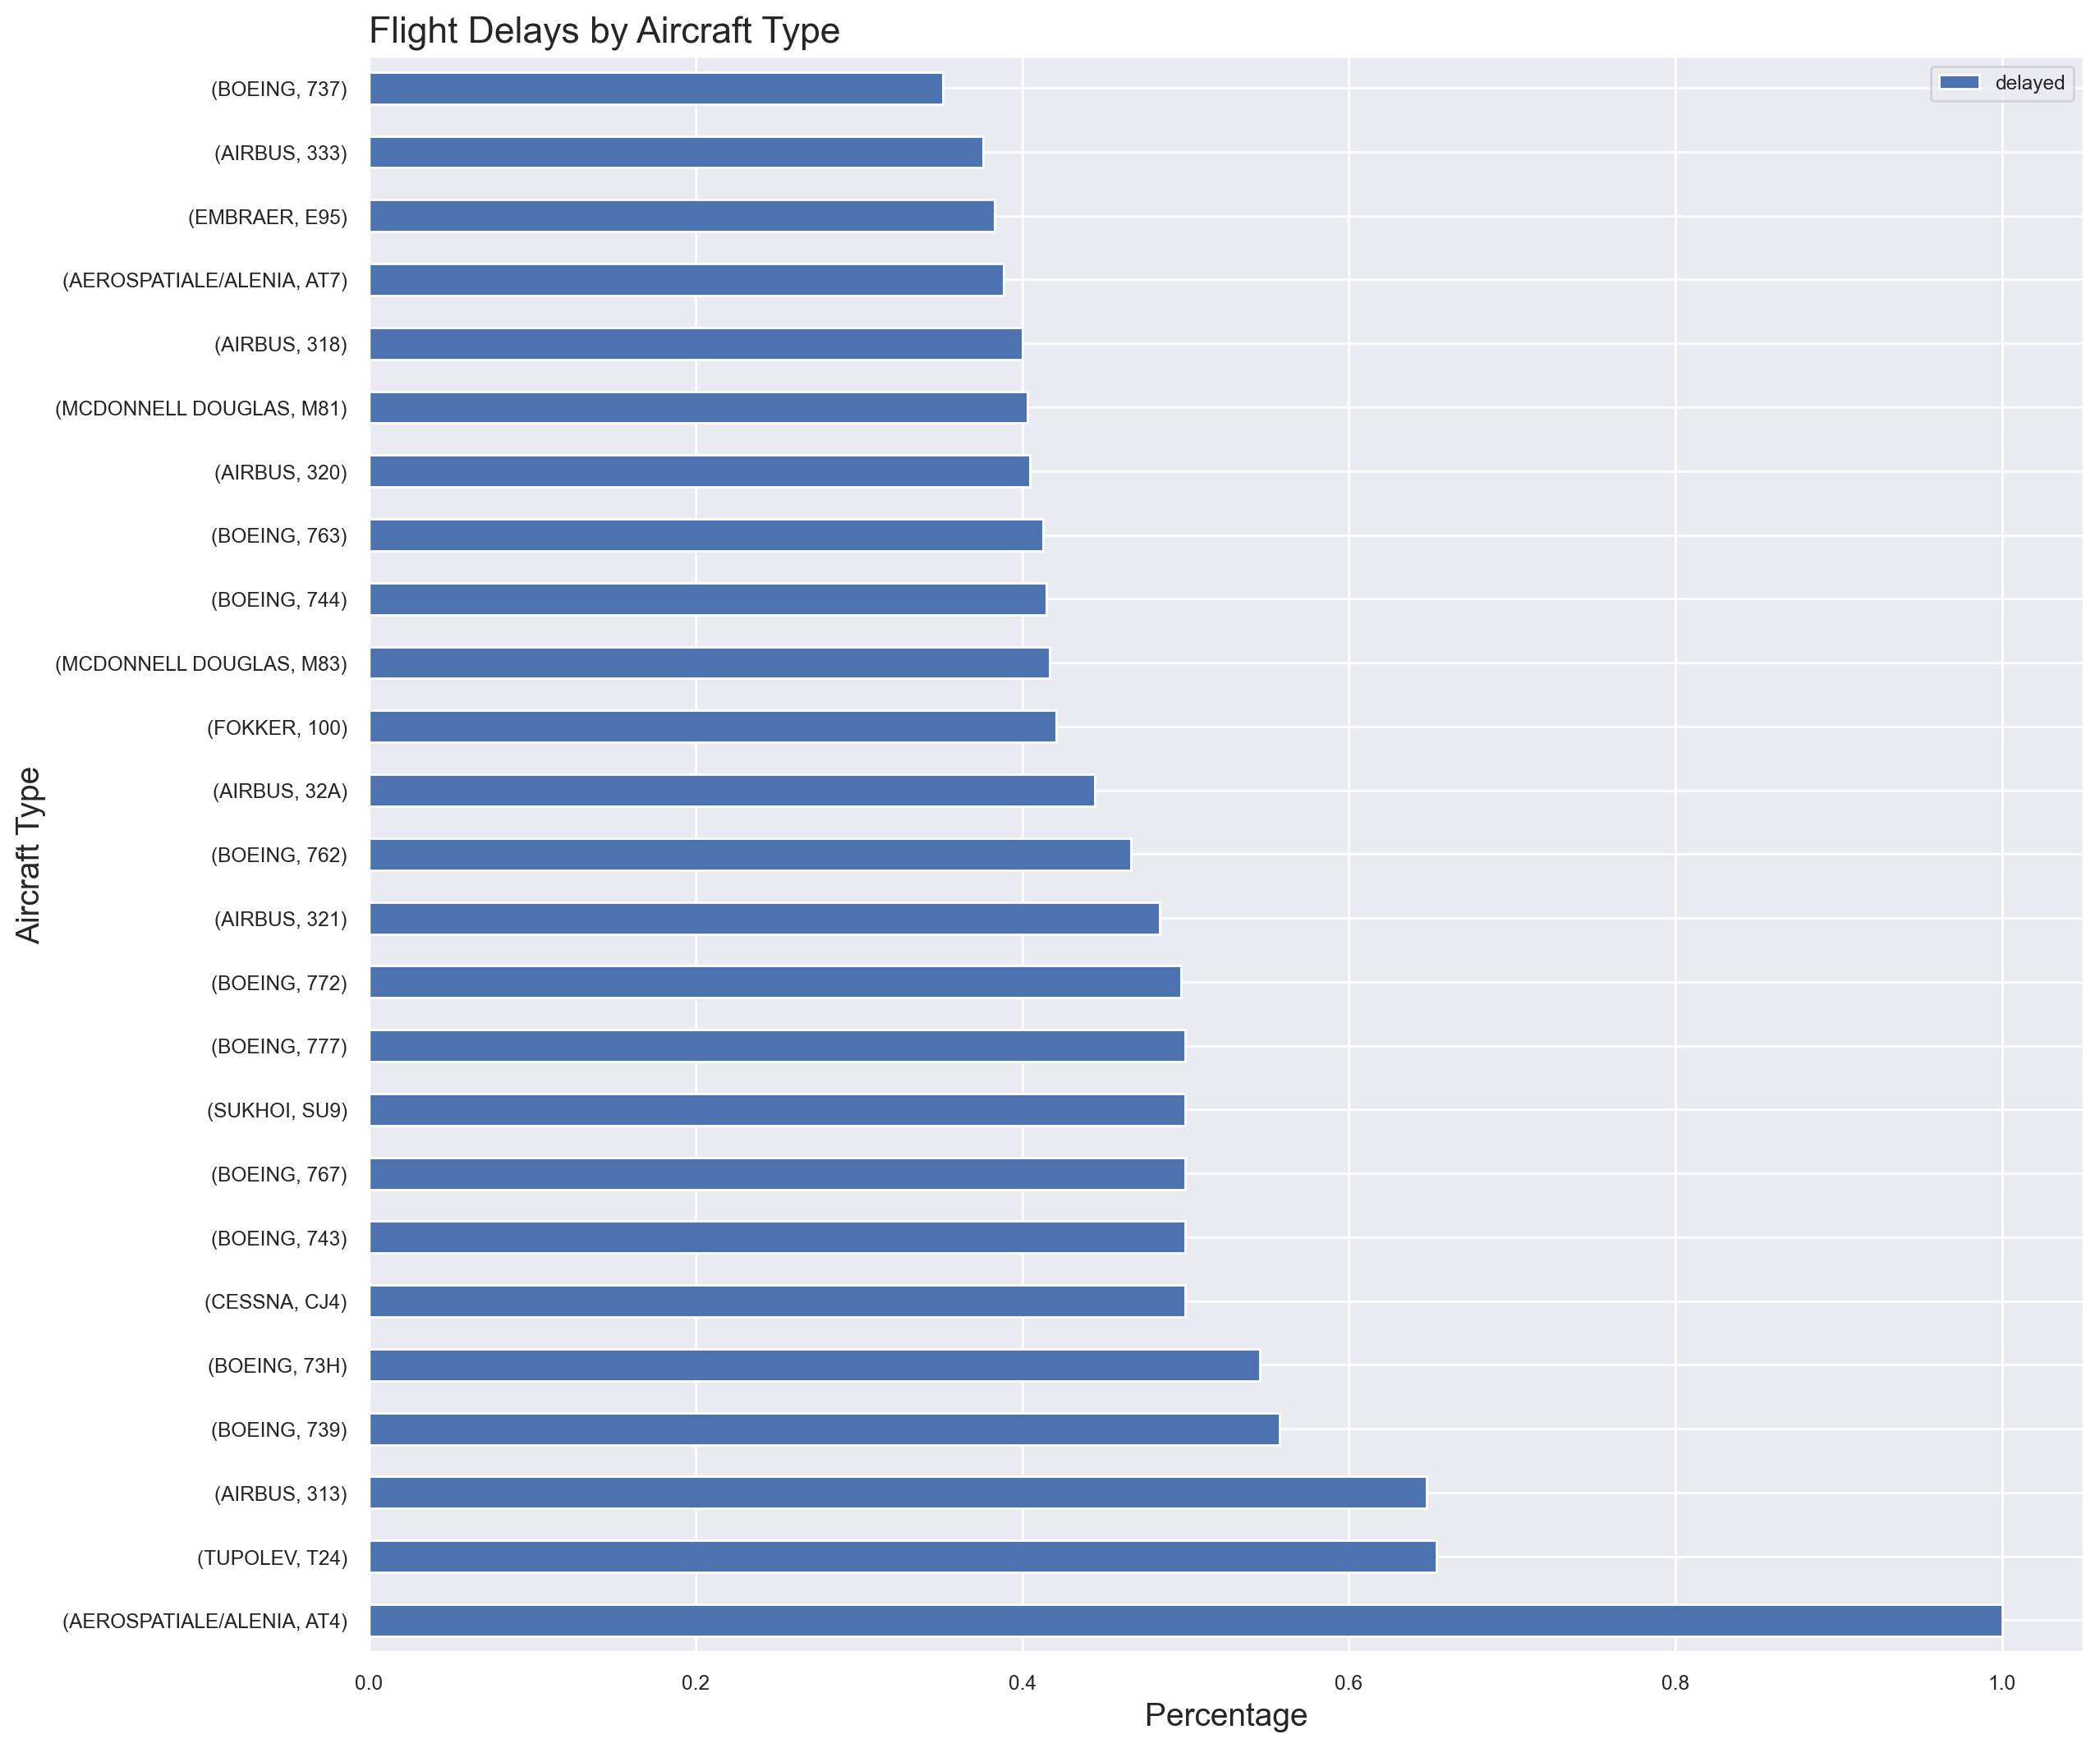

In [33]:
# create a horizontal bar plot showing relative flight delays by aircraft type
aircraft_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Aircraft Type', loc='left', fontsize = 16)
plt.ylabel('Aircraft Type', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **AEROSPATIALE/ALENIA AT4** has relatively the most delays among the aircraft types.  
<br/><br/>

In [34]:
# display the service type with most delays in absolute terms
service_abs = delay.groupby('service_type').count().sort_values(by='delayed', ascending=False)[['delayed']]
service_abs

,delayed
service_type,
"Normal Service (Sheduled, Passenger)",29469
"Passenger Only (Charter, Passenger)",2556
"Business Aviation/Air Taxi (Others, Not Specific)",760
Non-revenue (Positioning/Ferry/Delivery/Demo; Not specific),142
"Normal Service (Additional Flights, Passenger)",103
"Cargo and/or Mail (Charter, Cargo/Mai)",86
"General Aviation (Others, Not specific)",40
"Loose loaded cargo and/or preloaded devices(Sheduled,Cargo/Mail)",31
Government of the Russian Federation (VIP),29


In [35]:
# display the service type with most delays relatively to the total number of flights
service_rel = service_abs / df.groupby('service_type').count()[['delayed']]
service_rel.sort_values(by='delayed', ascending=False)

,delayed
service_type,
"Passenger Only (Charter, Passenger)",0.340256
Passenger and Cargo and/or Mail (Charter),0.333333
"Military (Others, Not specific)",0.333333
Non-revenue (Positioning/Ferry/Delivery/Demo; Not specific),0.185137
"Special (FAA/Government; Others, Not specific)",0.176471
"Loose loaded cargo and/or preloaded devices(Sheduled,Cargo/Mail)",0.176136
"Normal Service (Additional Flights, Passenger)",0.175768
"Normal Service (Sheduled, Passenger)",0.172239
State Order,0.155172


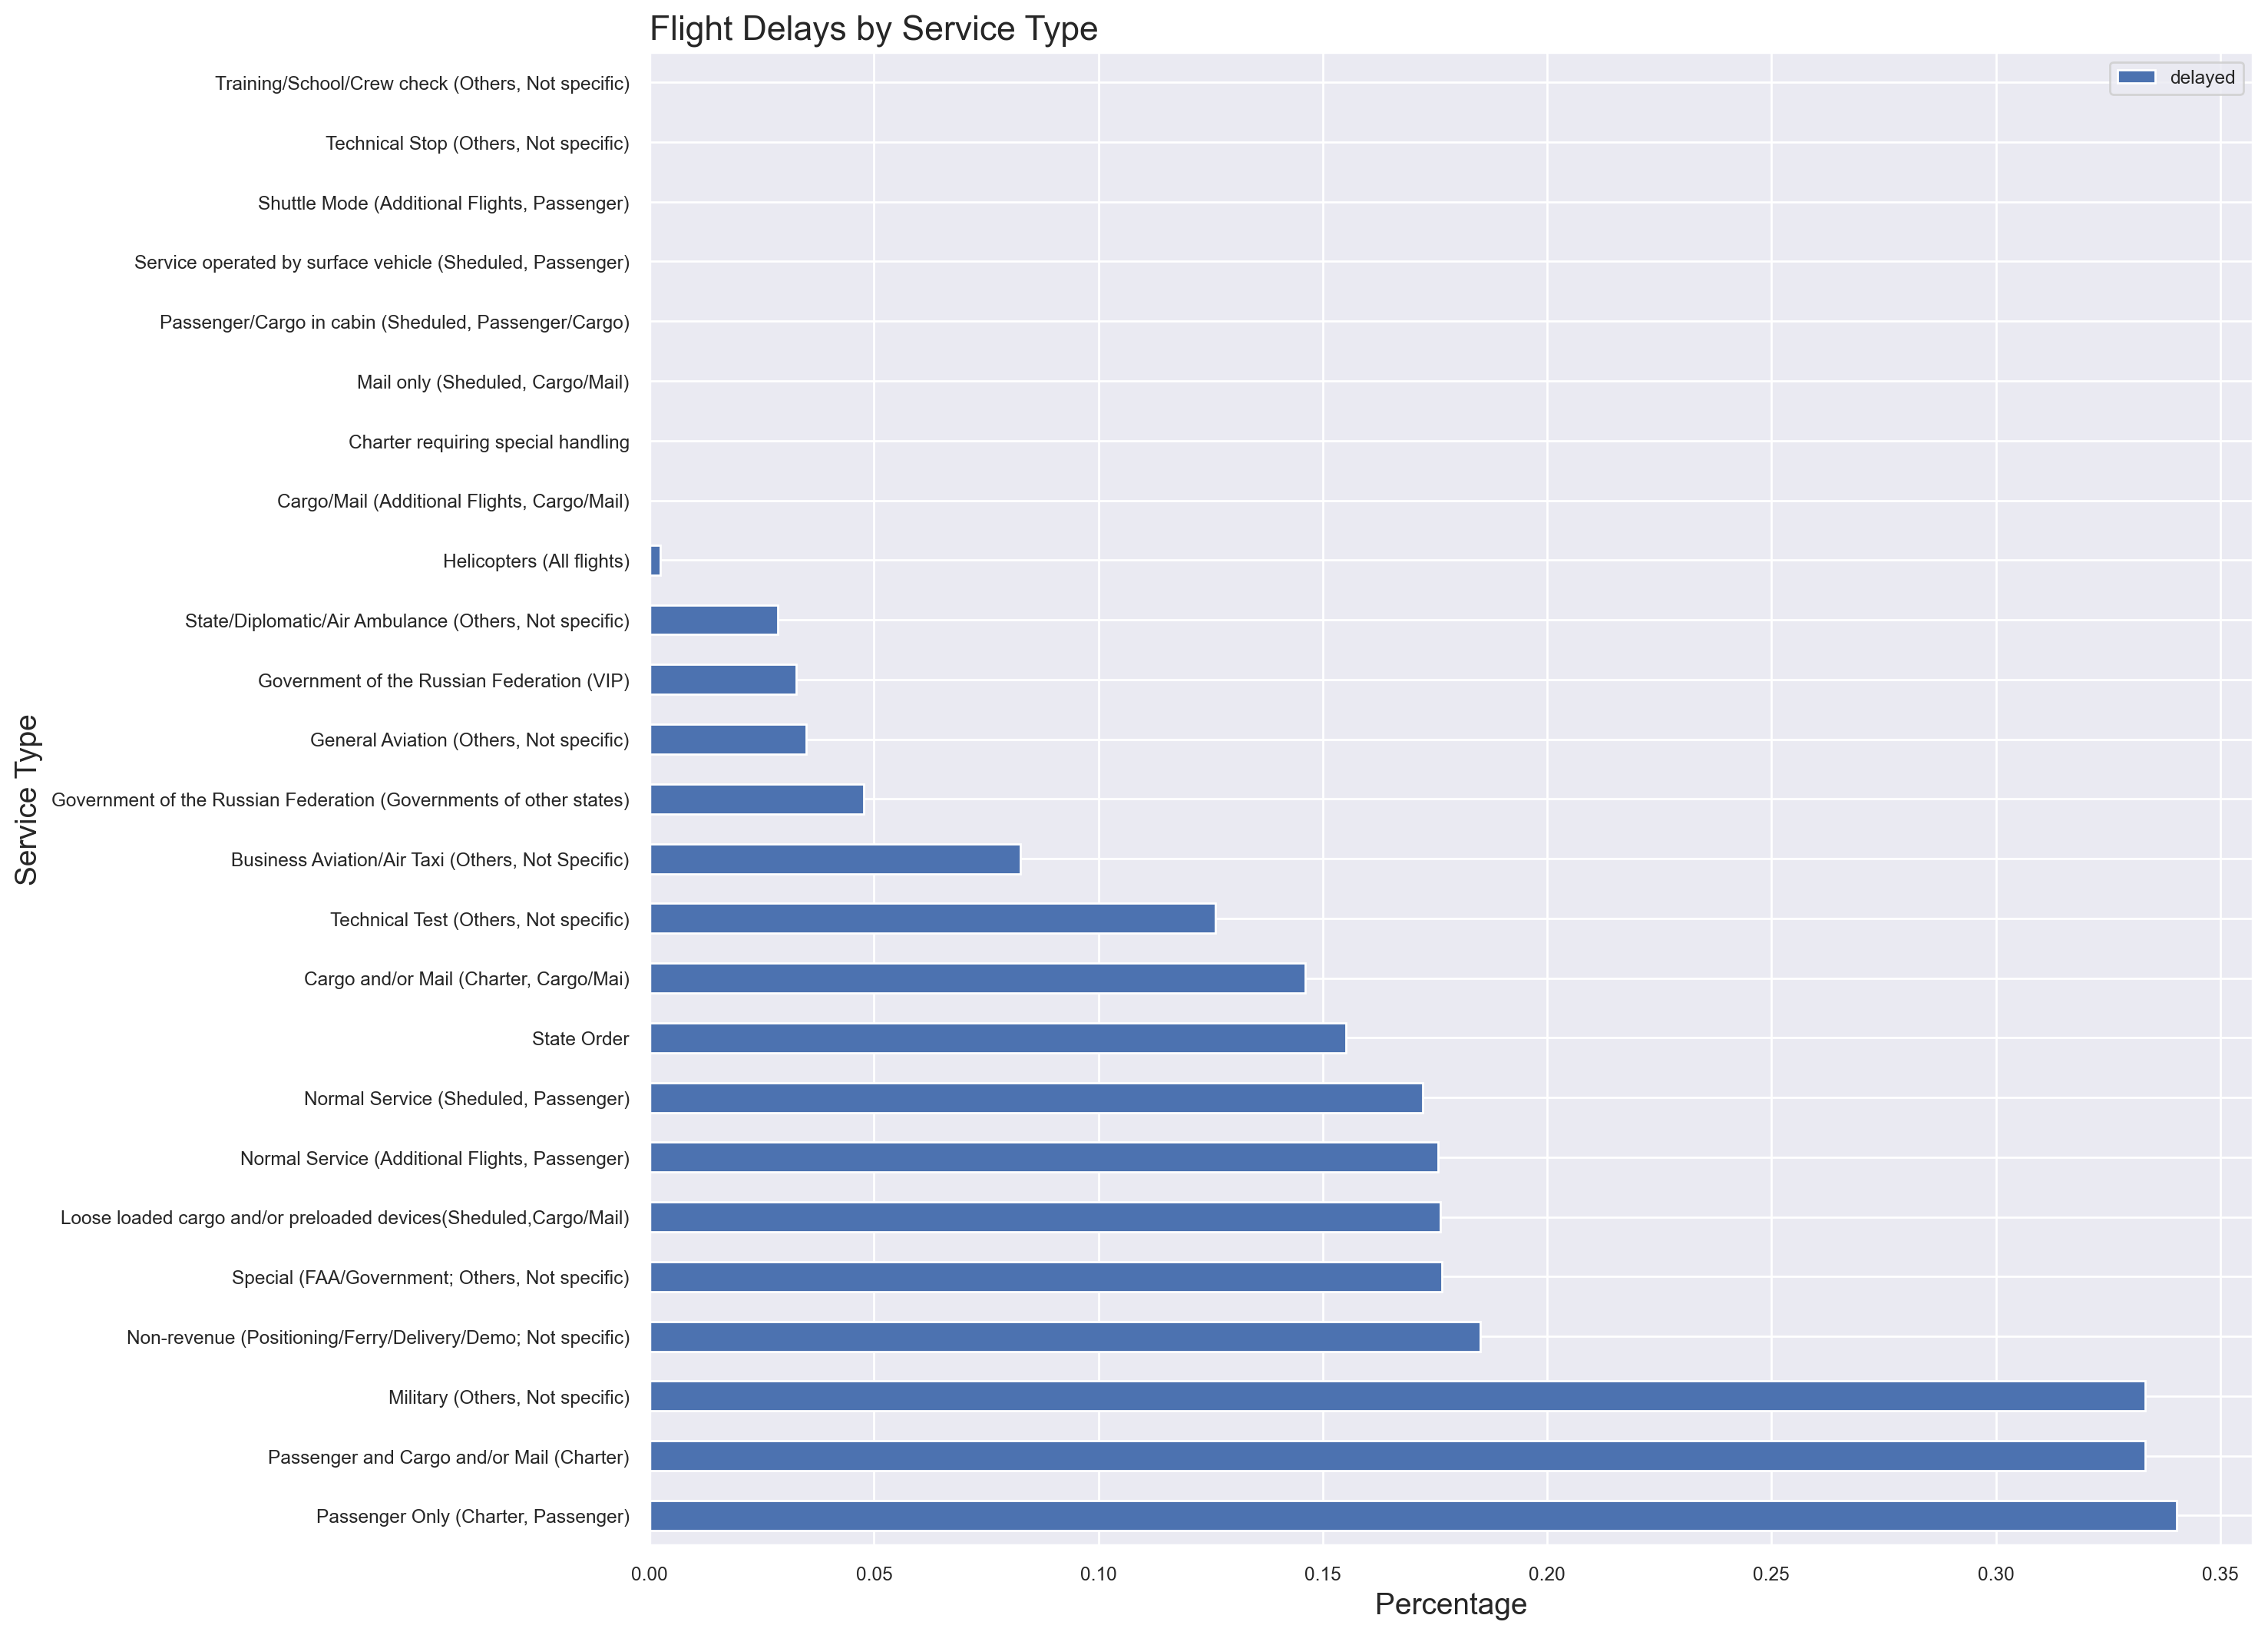

In [36]:
# create a horizontal bar plot showing relative flight delays by service type
service_rel.sort_values(by='delayed', ascending=False).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Service Type', loc='left', fontsize = 16)
plt.ylabel('Service Type', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **Passenger Only - Charter** has relatively the most delays among the service types, while some categories have no delay at all.  
<br/><br/>

## 3.6 Flight delays and countries

In [37]:
# display the country to which the flight is directed with most delays in absolute terms
country_dep_abs = df[(df.delayed == 1) & (df.departing == 1)].groupby('country_name').count().sort_values(by='delayed',
                  ascending=False)[['delayed']]
country_dep_abs

,delayed
country_name,
RUSSIAN FEDERATION,6138
RUSSIA EAST OF THE URAL MOUNTAINS,1068
UZBEKISTAN,766
GERMANY,620
TURKEY,411
FRANCE,397
UKRAINE,374
GREECE,350
EGYPT,334


In [38]:
# display the country to which the flight is directed with the most delays relatively to the total number of flights
country_dep_rel = country_dep_abs / df[df.departing == 1].groupby('country_name').count()[['delayed']]
country_dep_rel.sort_values(by='delayed', ascending=False)

,delayed
country_name,
GEORGIA,1.000000
VIET NAM,0.875000
MEXICO,0.863636
TUNISIA,0.560526
THAILAND,0.475862
...,...
SLOVENIA,NaN
SRI LANKA,NaN
SUDAN,NaN


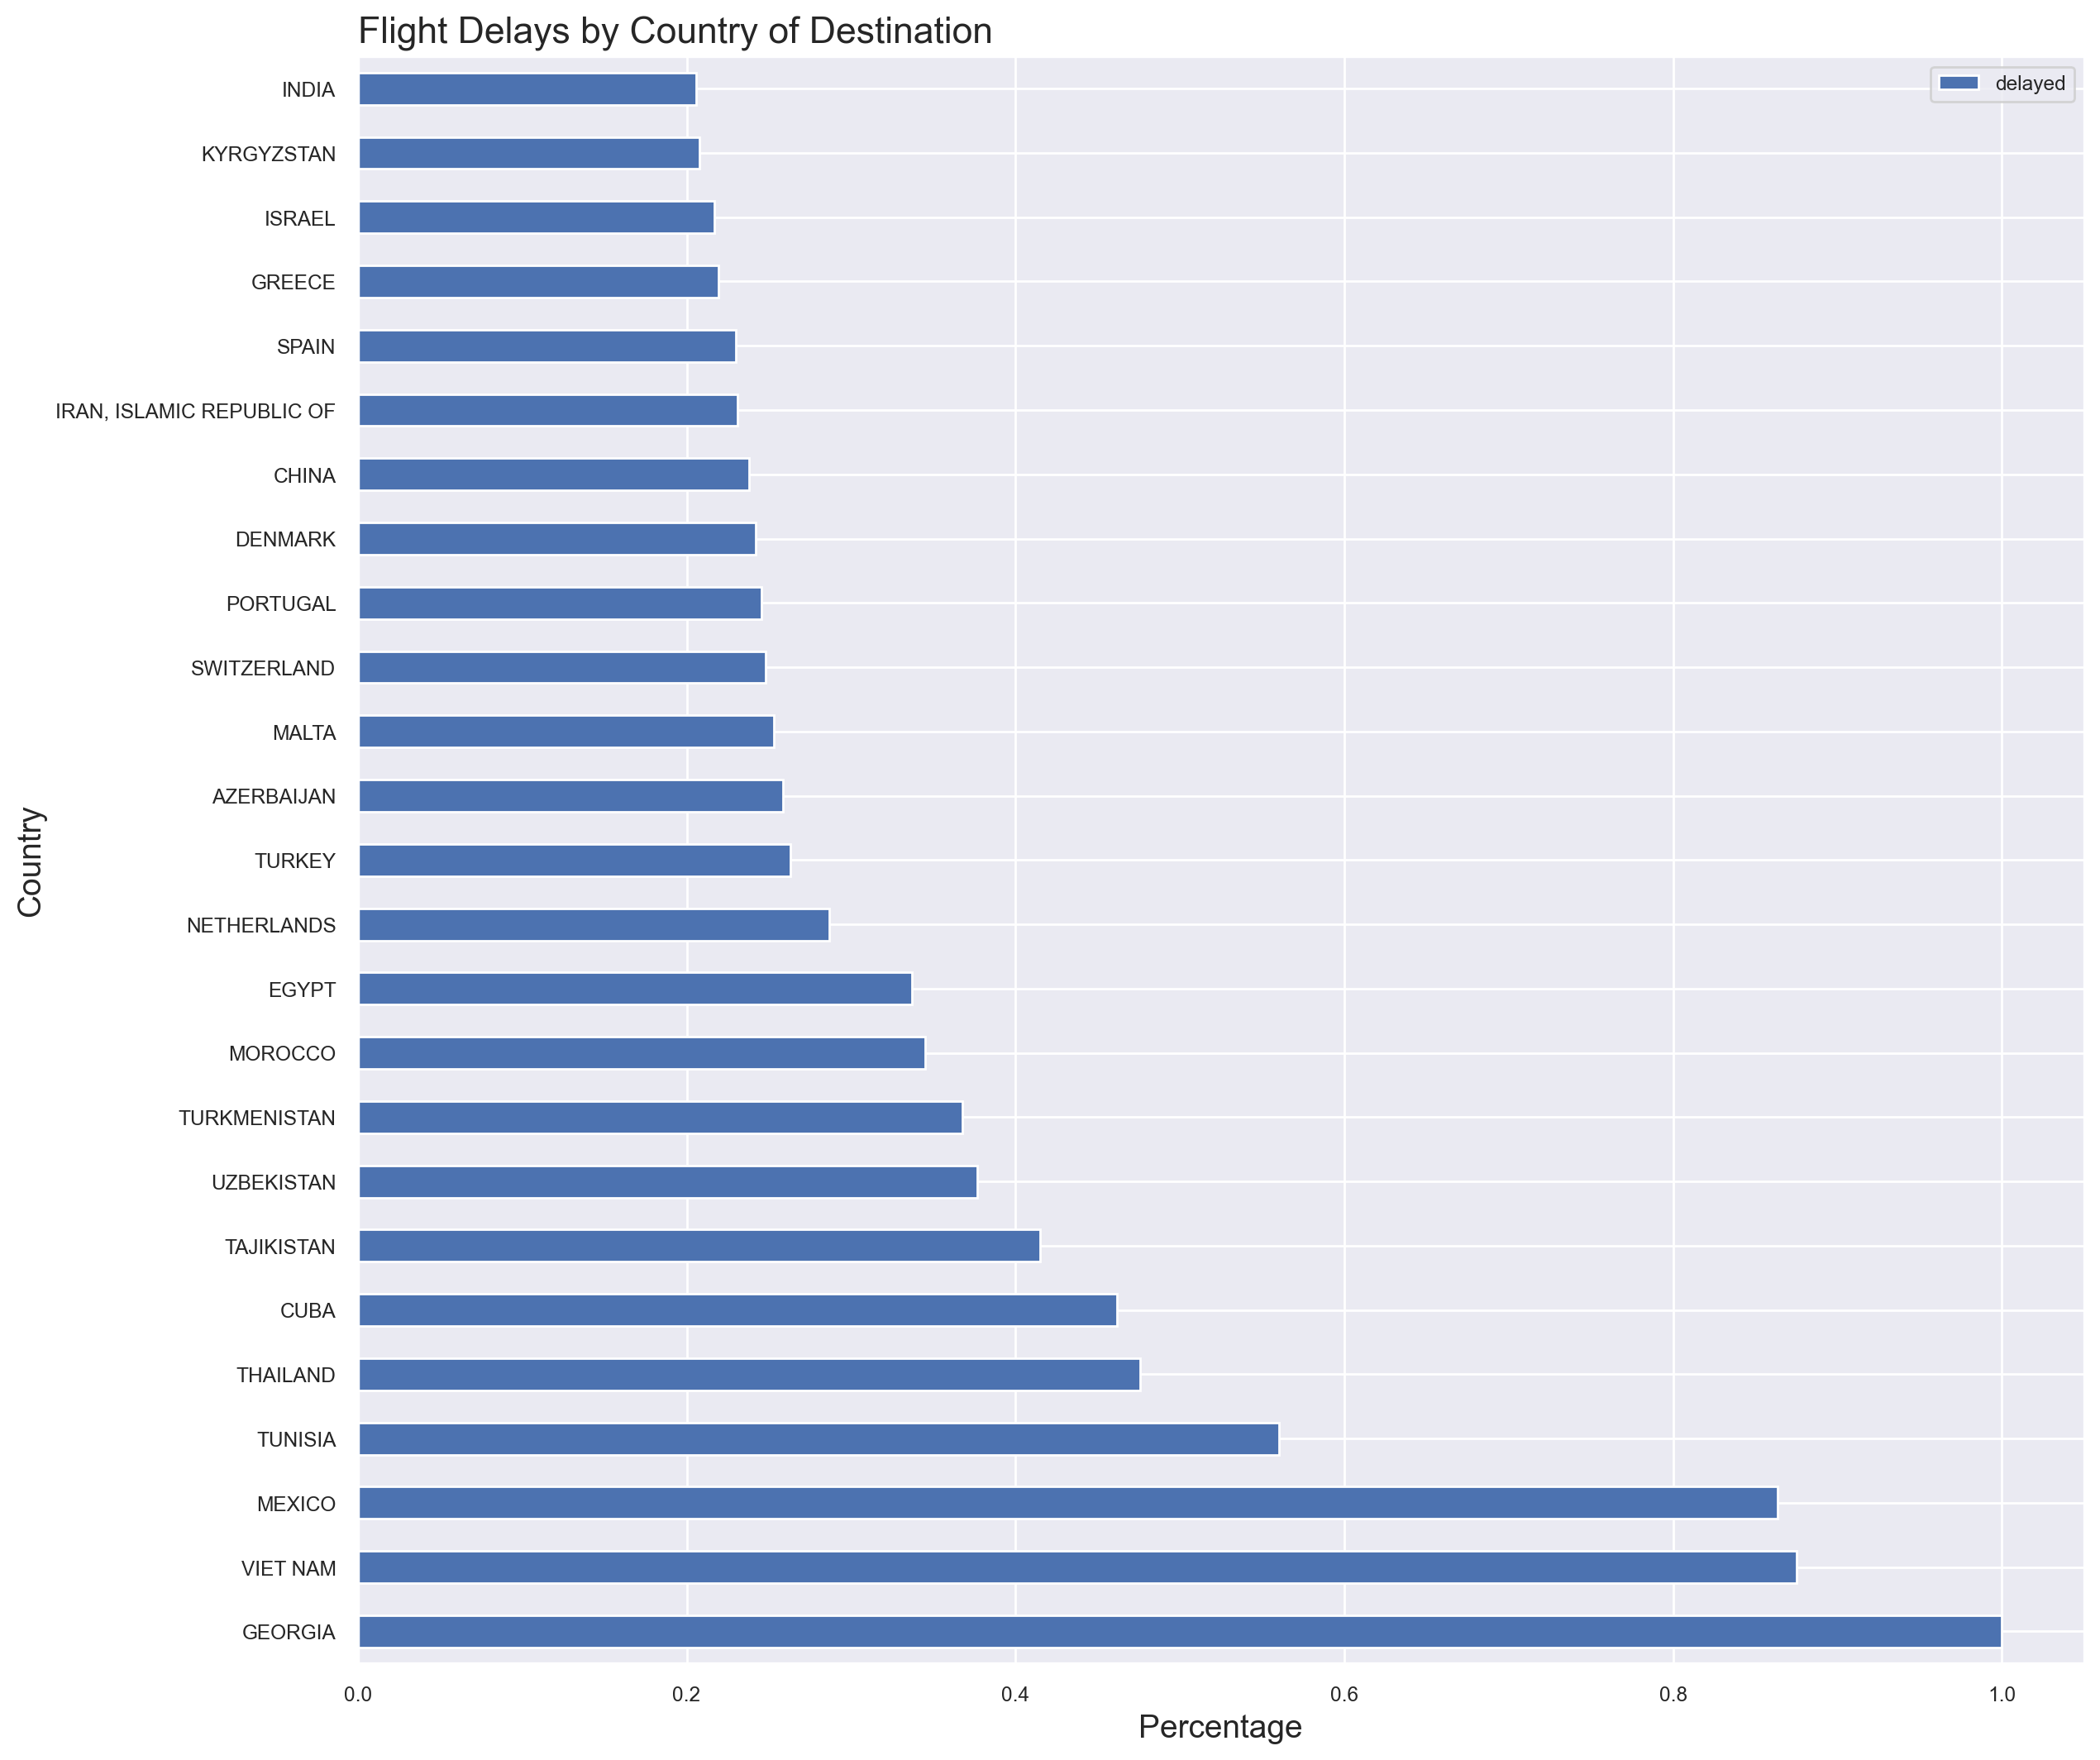

In [39]:
# create a horizontal bar plot showing the relative flight delays by country of destination
country_dep_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Destination', loc='left', fontsize = 16)
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that flights departing to **Georgia** have relatively the most delays.  
<br/><br/>

In [40]:
# display the country from which the flight arrived with most delays in absolute terms
country_arr_abs = df[(df.delayed == 1) & (df.departing == 0)].groupby('country_name').count().sort_values(by='delayed',
                  ascending=False)[['delayed']]
country_arr_abs

,delayed
country_name,
RUSSIAN FEDERATION,7339
GERMANY,1649
DOMINICAN REPUBLIC,795
FRANCE,766
ITALY,597
...,...
PAKISTAN,1
"IRAN, ISLAMIC REPUBLIC OF",1
GEORGIA,1


In [41]:
# display the country from which the flight arrived with the most delays relatively to the total number of flights
country_arr_rel = country_arr_abs / df[df.departing == 0].groupby('country_name').count()[['delayed']]
country_arr_rel.sort_values(by='delayed', ascending=False)

,delayed
country_name,
NETHERLANDS,0.631579
DOMINICAN REPUBLIC,0.563031
HUNGARY,0.500000
GEORGIA,0.500000
QATAR,0.500000
...,...
MAURITIUS,NaN
ROMANIA,NaN
SAUDI ARABIA,NaN


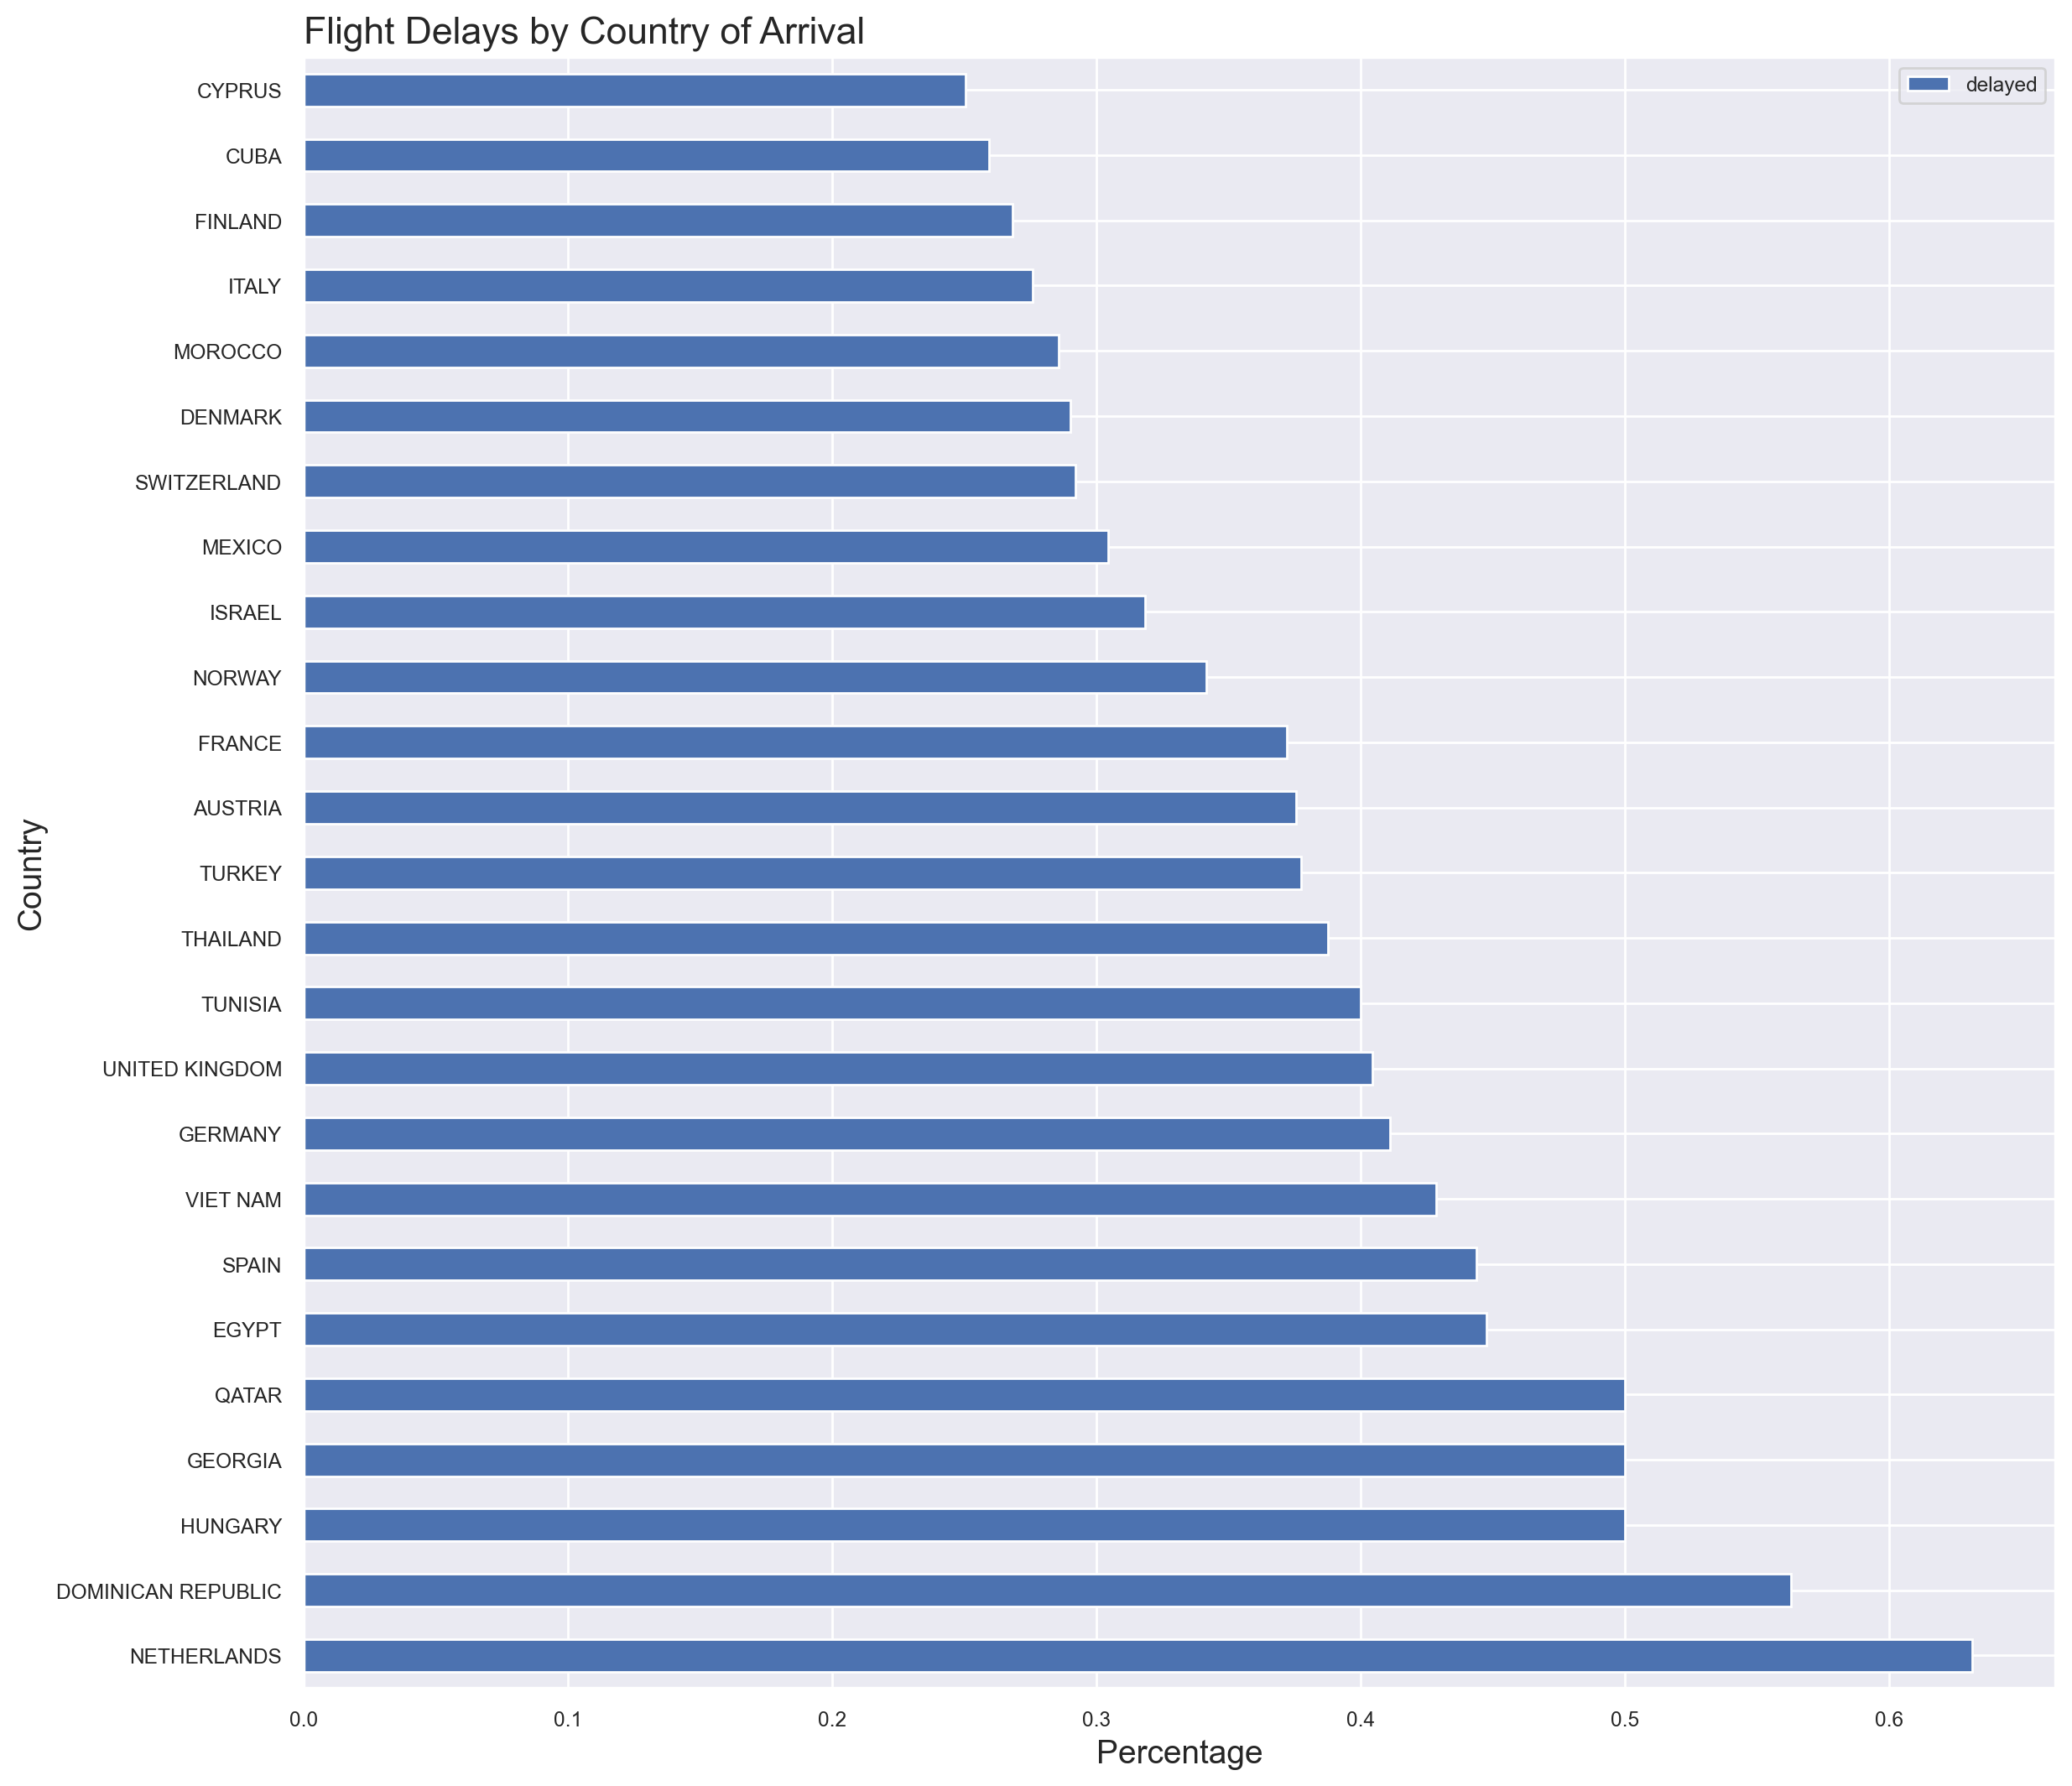

In [42]:
# create a horizontal bar plot showing the relative flight delays by country of arrival
country_arr_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Arrival', loc='left', fontsize = 16)
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that flights arriving from **Netherlands** has relatively the most delays.  
<br/><br/>

In [43]:
# display the spot number with most delays in absolute terms
spot_abs = delay.groupby('spot_number').count().sort_values(by='delayed', ascending=False)[['delayed']]
spot_abs

,delayed
spot_number,
66,1638
65,1599
67,1544
36,1454
70,1288
...,...
605D,1
606A,1
608C,1


In [44]:
# display the spot number with most delays relatively to the total number of flights
spot_rel = spot_abs / df.groupby('spot_number').count()[['delayed']]
spot_rel.sort_values(by='delayed', ascending=False)

,delayed
spot_number,
93,1.000000
397A,0.916667
104,0.625000
35A,0.518519
94,0.500000
...,...
88B,NaN
89A,NaN
91,NaN


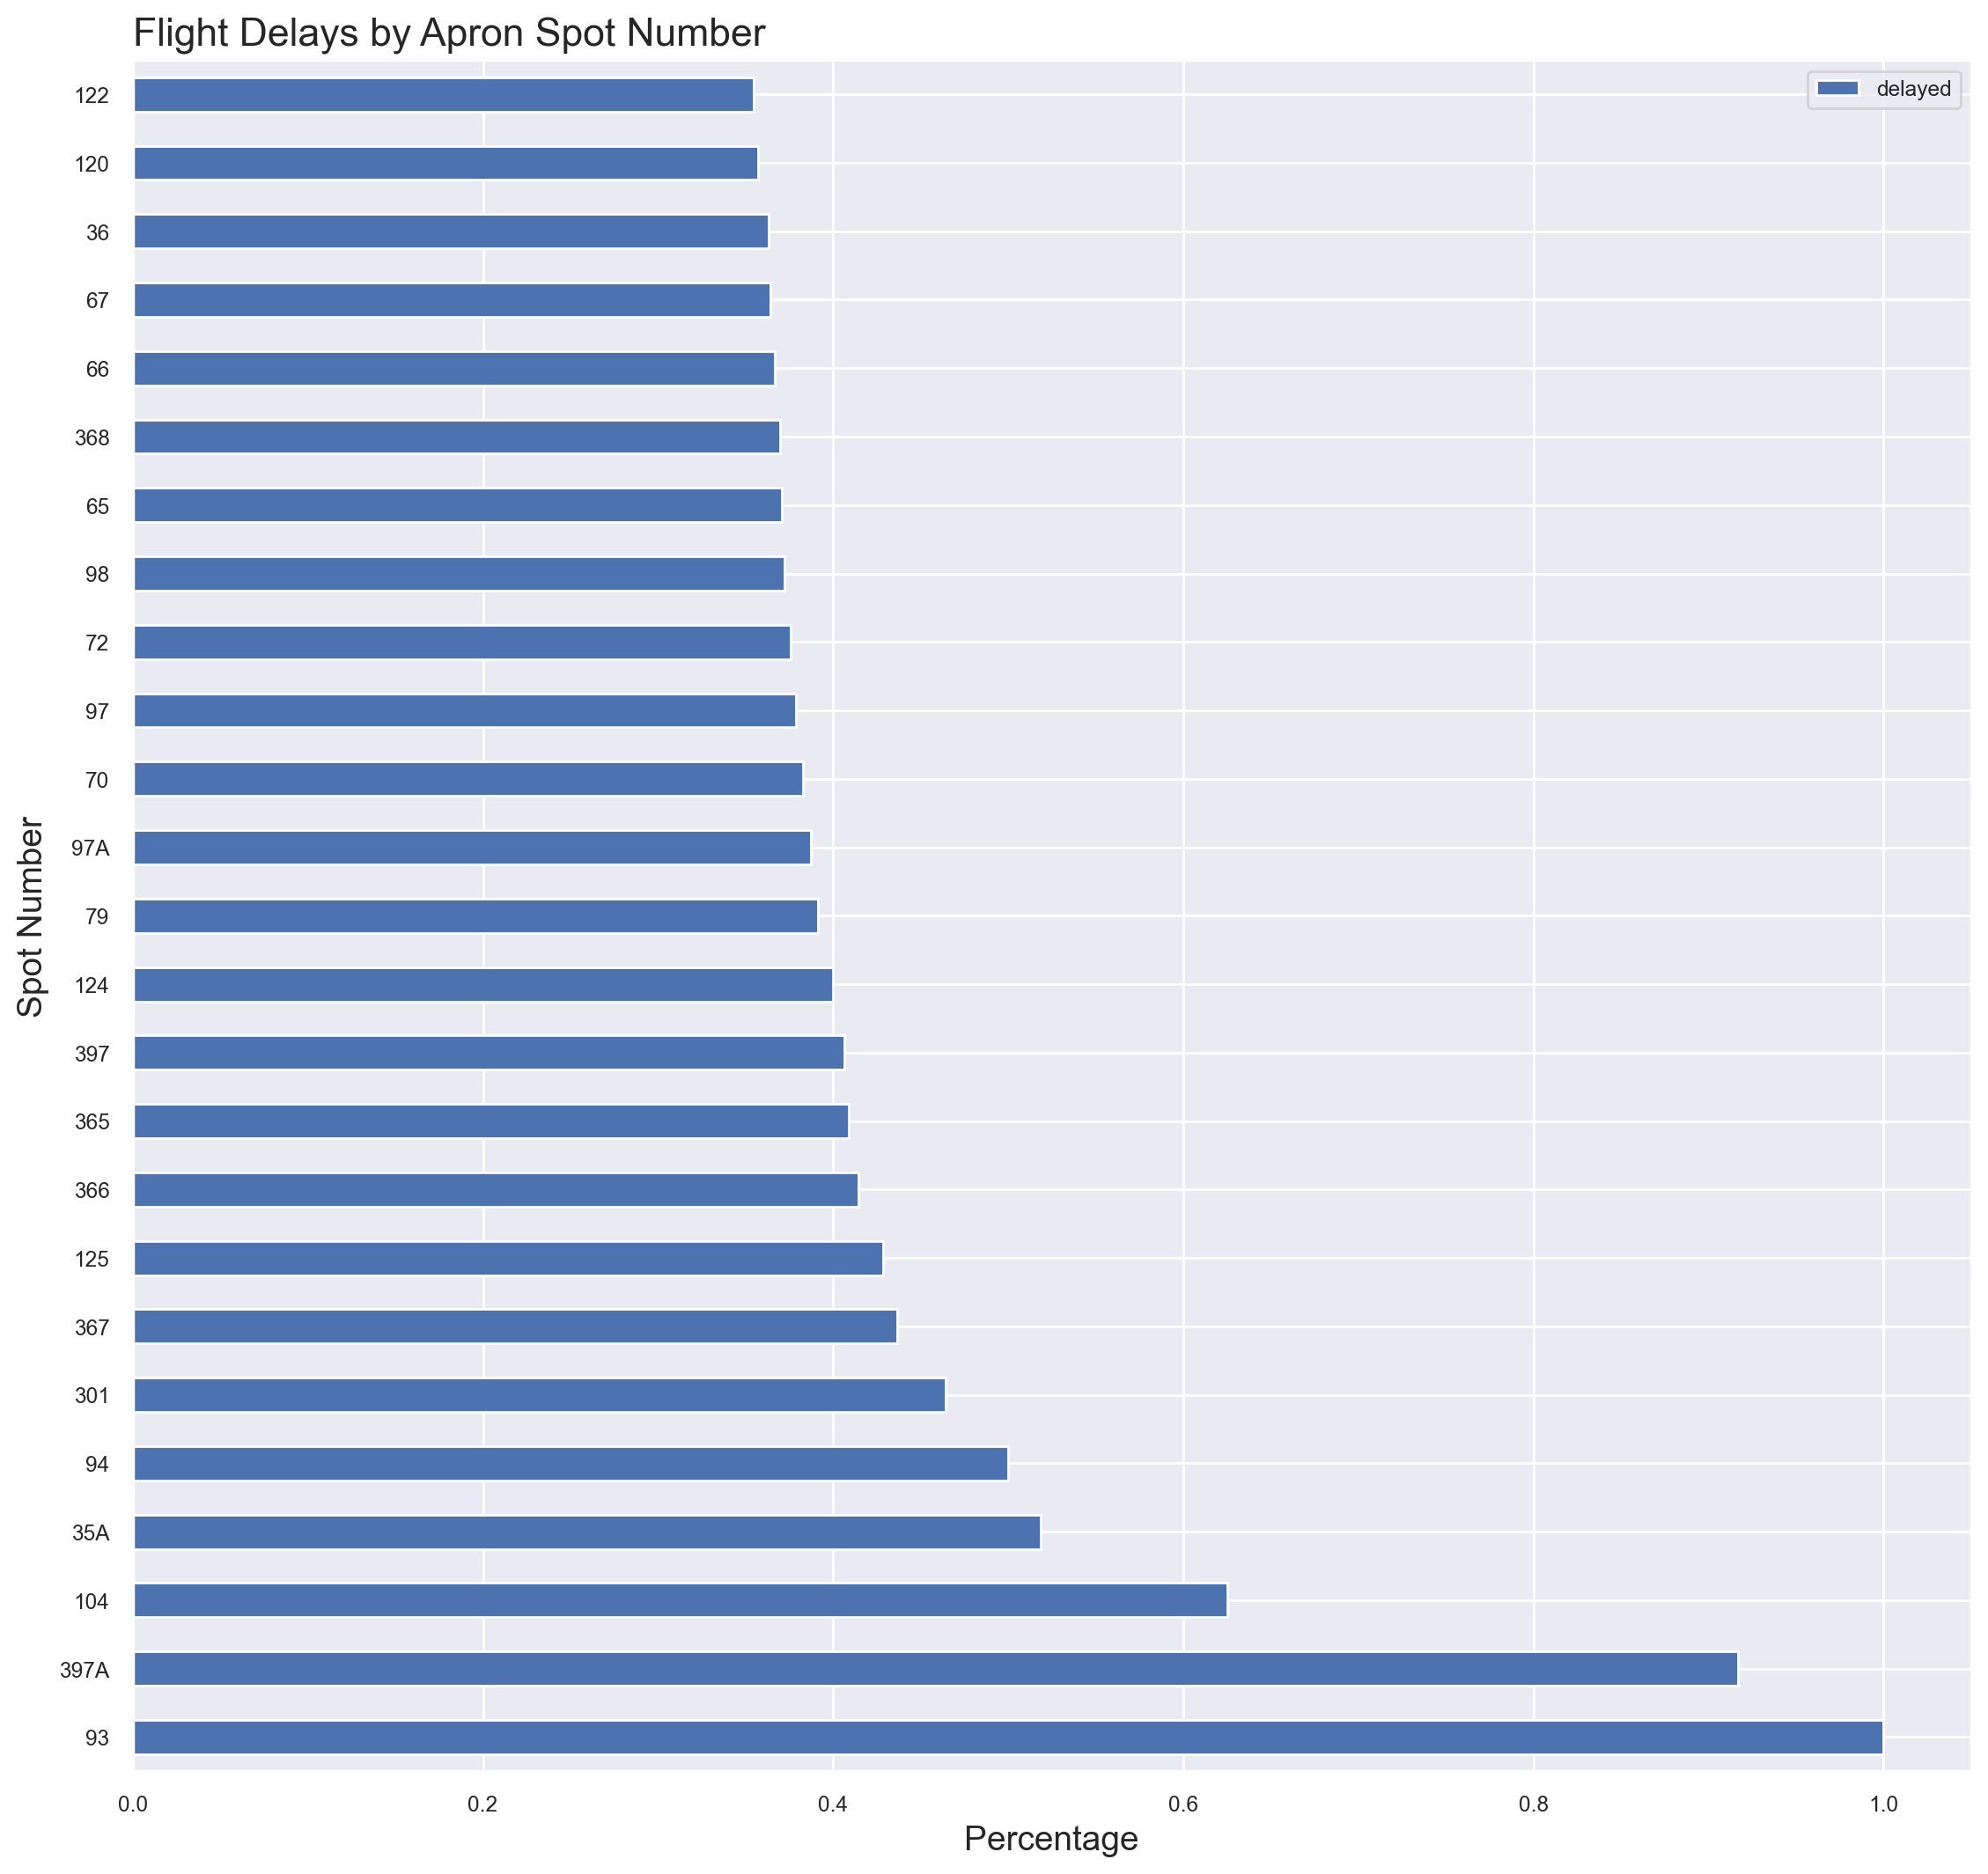

In [45]:
# create a horizontal bar plot showing the relative flight delays by apron spot number
spot_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Apron Spot Number', loc='left', fontsize = 16)
plt.ylabel('Spot Number', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **93** has relatively the most delays among the apron spot numbers.  
<br/><br/>

In [46]:
# display the average number of passengers for delayed and on-time flights
pax = df.groupby('delayed')[['pax_total']].mean()
pax

,pax_total
delayed,
0,97.086911
1,122.903605


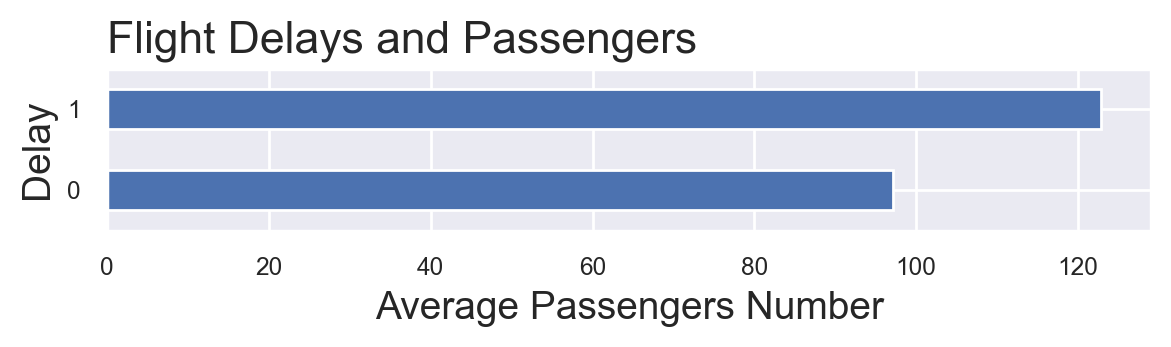

In [48]:
# create a horizontal bar plot showing the average number of passengers for delayed and on-time flights
pax.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Passengers', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Passengers Number', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have a significantly higher average number of passengers than non-delayed flights.  
<br/><br/>

In [49]:
# display the average load factor for delayed and on-time flights
lf = df.groupby('delayed')[['load_factor']].mean()
lf

,load_factor
delayed,
0,81.961487
1,77.461711


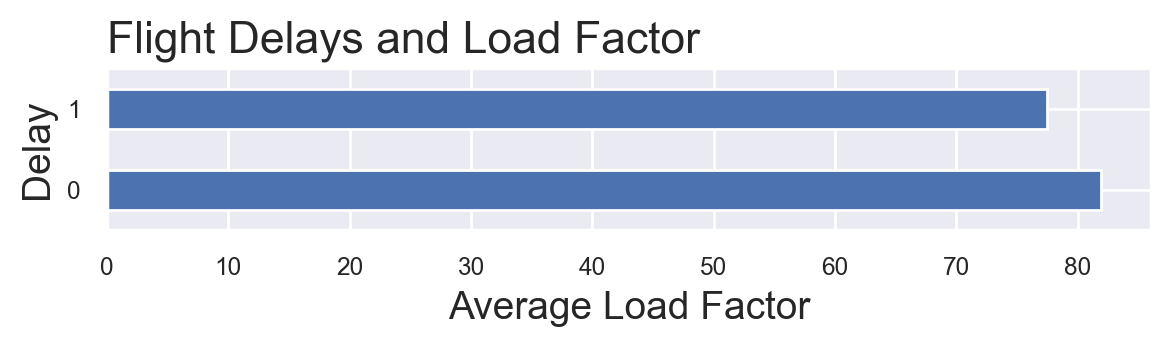

In [51]:
# create a horizontal bar plot showing the average load factor for delayed and on-time flights
lf.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Load Factor', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Load Factor', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **non-delayed flights** have higher average load factor than delayed flights.  
<br/><br/>

In [52]:
# display the average baggage weight for delayed and on-time flights
bag = df.groupby('delayed')[['baggage_weight']].mean()
bag

,baggage_weight
delayed,
0,1019.065780
1,1460.758661


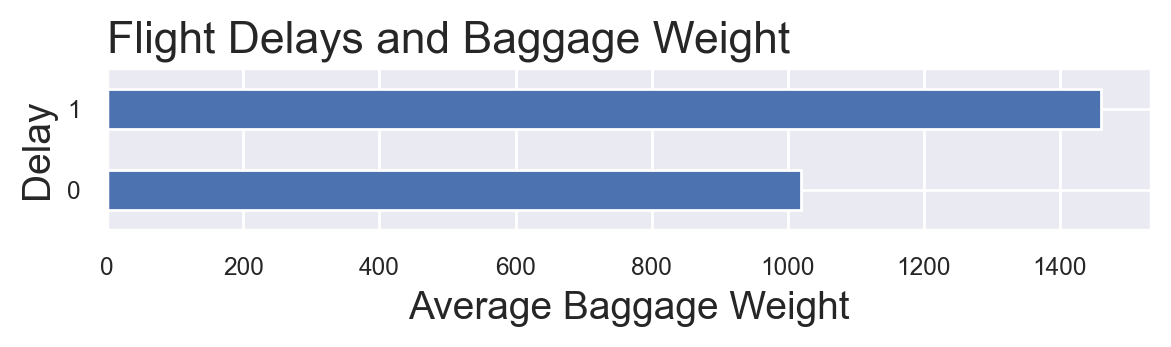

In [53]:
# create a horizontal bar plot showing the average baggage weight for delayed and on-time flights
bag.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Baggage Weight', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Baggage Weight', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have significantly higher average baggage weight than non-delayed flights.  
<br/><br/>

## 3.7 Flight delays and weather

In [54]:
# display the average precipitation for delayed and on-time flights
precip = df.groupby('delayed')[['precipitation']].mean()
precip

,precipitation
delayed,
0,0.083463
1,0.091088


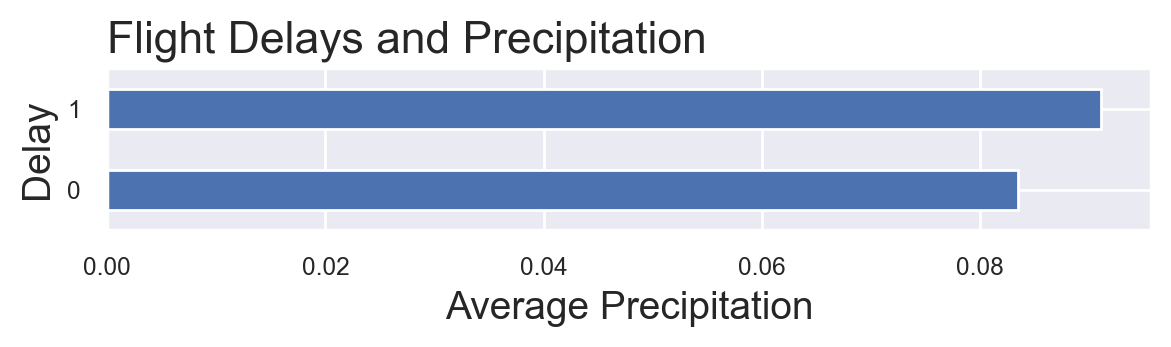

In [55]:
# create a horizontal bar plot showing the average precipitation for delayed and on-time flights
precip.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Precipitation', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Precipitation', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have higher average precipitation than non-delayed flights.  
<br/><br/>

In [56]:
# display the most common weather code for delayed and on-time flights
wcode = df.groupby(['weather_code', 'delayed'])[['weather_code']].count()
wcode

weather_code
weather_code delayed              
0            0               30543
             1                6248
1            0               32872
             1                6591
2            0               23256
             1                4745
3            0               47197
             1                9424
51           0               14145
             1                2759
53           0                5498
             1                1158
61           0                2054
             1                 499
63           0                 541
             1                 127
71           0                4686
             1                1316
73           0                1241
             1                 393

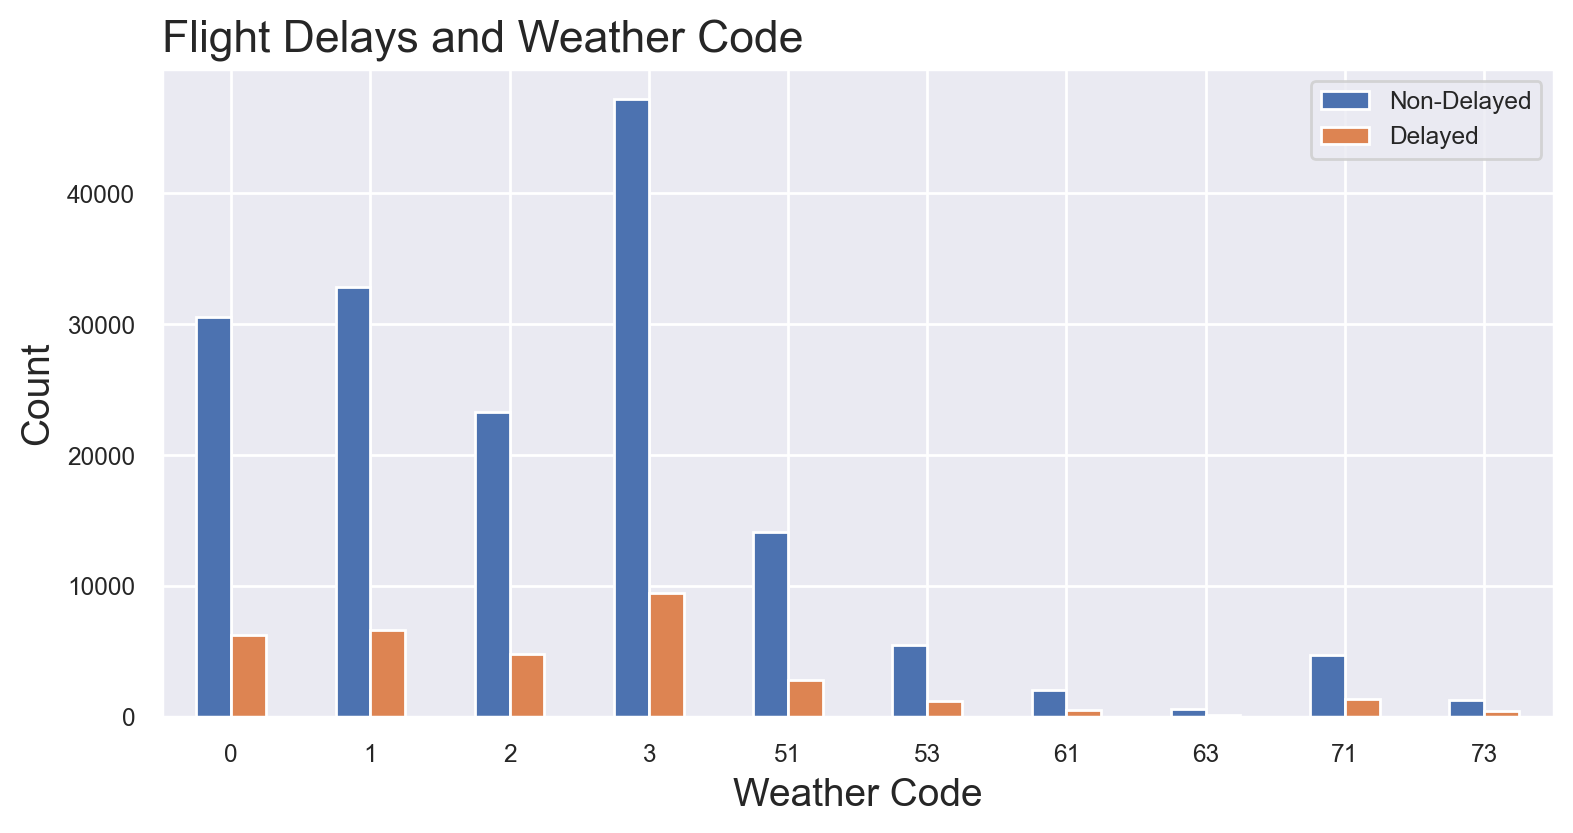

In [57]:
# create a bar plot showing the most common weather code for delayed and on-time flights
wcode.unstack().plot(kind='bar', rot=0, figsize=(8,4))
plt.title('Flight Delays and Weather Code', loc='left', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Weather Code', fontsize = 14)

legend_labels = ['Non-Delayed', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

The graph above shows that both delayed and non-delayed flights have **3** as the most common weather code.  
<br/><br/>

In [58]:
# display the average wind speed for delayed and on-time flights
wind = df.groupby('delayed')[['wind_speed']].mean()
wind

,wind_speed
delayed,
0,11.995676
1,11.831293


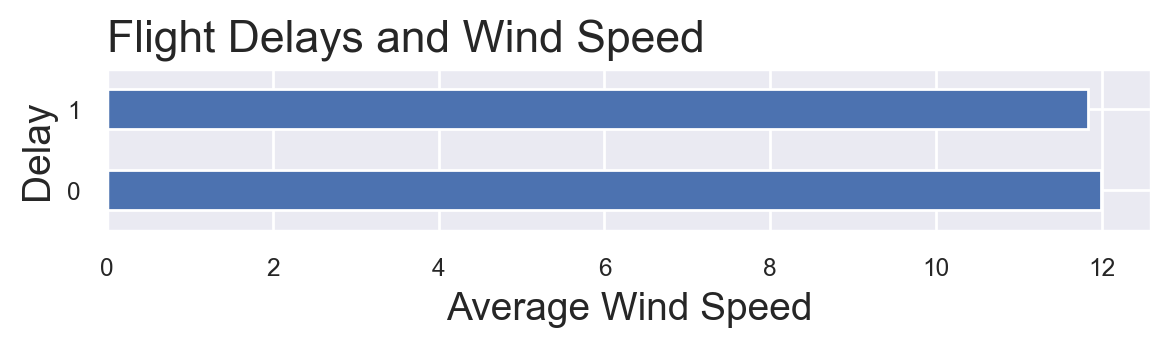

In [59]:
# create a horizontal bar plot showing the average wind speed for delayed and on-time flights
wind.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Wind Speed', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Wind Speed', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **non-delayed flights** have slightly higher average wind speed than non-delayed flights.  
<br/><br/>

In [60]:
# check for missing values
df[df.isnull().sum(axis=1)>0]

,date,year,month,day,weekday,hour,departing,terminal_num,airline_code,airline_name,...,load_factor,baggage_weight,mail_weight,temperature,relative_humidity,apparent_temperature,precipitation,weather_code,wind_speed,delayed
0,2013-01-01 03:00,2013,1,1,1,3,0.0,2,N4,NORDWIND AIRLINES,...,67.586,3327.0,NaN,0.9,94,-2.4,0.0,3,13.0,0
1,2013-01-01 03:00,2013,1,1,1,3,0.0,1,OZ,ASIANA AIRLINES,...,NaN,NaN,NaN,0.9,94,-2.4,0.0,3,13.0,1
2,2013-01-01 05:00,2013,1,1,1,5,1.0,2,N4,NORDWIND AIRLINES,...,94.667,3224.0,0.0,0.9,94,-2.9,0.0,3,17.0,1
3,2013-01-01 06:00,2013,1,1,1,6,1.0,1,OZ,ASIANA AIRLINES,...,NaN,NaN,NaN,0.7,94,-3.3,0.0,3,18.1,0
4,2013-01-01 07:00,2013,1,1,1,7,0.0,2,LY,EL AL ISRAEL AIRLINES,...,8.235,244.0,173.0,0.8,94,-3.6,0.2,71,19.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195288,2013-12-31 22:00,2013,12,31,1,22,0.0,1,FV,ROSSIYA AIRLINES,...,34.667,211.0,0.0,1.2,84,-2.8,0.0,2,16.1,0
195289,2013-12-31 22:00,2013,12,31,1,22,0.0,1,FV,ROSSIYA AIRLINES,...,61.333,355.0,0.0,1.2,84,-2.8,0.0,2,16.1,0
195290,2013-12-31 22:00,2013,12,31,1,22,0.0,1,U6,URAL AIRLINES,...,104.211,2044.0,0.0,1.2,84,-2.8,0.0,2,16.1,1
195291,2013-12-31 22:00,2013,12,31,1,22,1.0,2,BT,AIRBALTIC,...,64.035,334.0,637.0,1.2,84,-2.8,0.0,2,16.1,0


#### At this stage every row has some null values.
Some columns are going to be dropped entirely, while for some others we are going to remove the rows.

***